<a href="https://colab.research.google.com/github/francji1/01ZLMA/blob/main/code/01ZLMA_ex05_GLM_Model_Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01ZLMA - Exercise 05

Exercise 05 of the course 01ZLMA.

# Model Diagnostics - Post-hoc analysis of glm

How to check if our GLM is sufficient and how to do it in Python/ R




## Dataset trees

The volume y (in cubic feet) of 31 black cherry trees (střemcha pozdní) was measured as well as the height (in feet) and the girth, or diameter,
at breast height (in inches). The volume of the tree is related to the volume of timber, which is important economically.

More information can be find in Chapter 8: Generalized Linear Models: Diagnostics (Peter K. Dunn and Gordon K. Smyth, Generalized Linear Models With Examples in R)


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats



In [ ]:
# Load the R magic extension
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R -o trees
trees

   Girth Height Volume
1    8.3     70   10.3
2    8.6     65   10.3
3    8.8     63   10.2
4   10.5     72   16.4
5   10.7     81   18.8
6   10.8     83   19.7
7   11.0     66   15.6
8   11.0     75   18.2
9   11.1     80   22.6
10  11.2     75   19.9
11  11.3     79   24.2
12  11.4     76   21.0
13  11.4     76   21.4
14  11.7     69   21.3
15  12.0     75   19.1
16  12.9     74   22.2
17  12.9     85   33.8
18  13.3     86   27.4
19  13.7     71   25.7
20  13.8     64   24.9
21  14.0     78   34.5
22  14.2     80   31.7
23  14.5     74   36.3
24  16.0     72   38.3
25  16.3     77   42.6
26  17.3     81   55.4
27  17.5     82   55.7
28  17.9     80   58.3
29  18.0     80   51.5
30  18.0     80   51.0
31  20.6     87   77.0


In [ ]:
trees

,Girth,Height,Volume
1,8.3,70.0,10.3
2,8.6,65.0,10.3
3,8.8,63.0,10.2
4,10.5,72.0,16.4
5,10.7,81.0,18.8
6,10.8,83.0,19.7
7,11.0,66.0,15.6
8,11.0,75.0,18.2
9,11.1,80.0,22.6
10,11.2,75.0,19.9


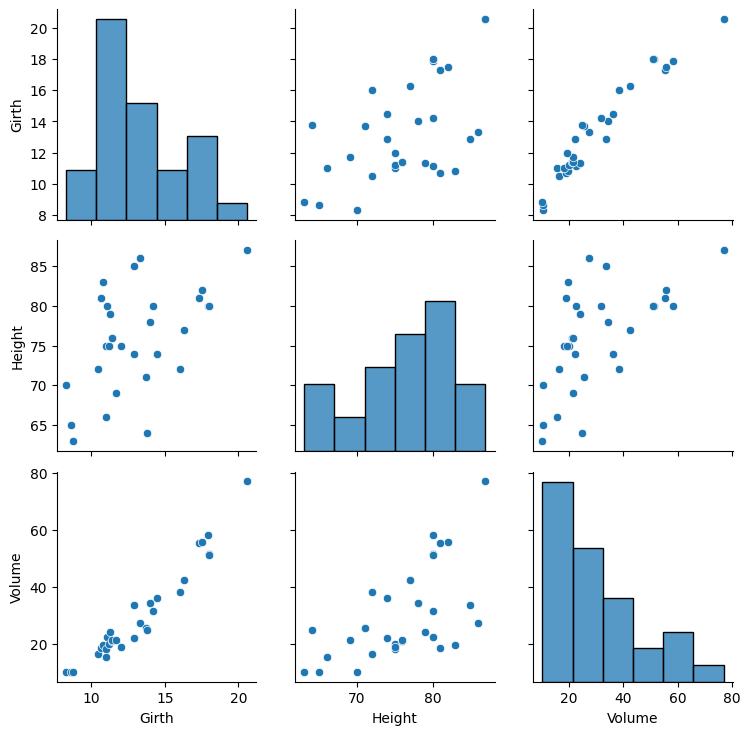

In [ ]:
# basic graphs of dataset
g = sns.PairGrid(trees)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

The relationships between the tree volume and height, and tree volume and girth, both appear non-linear.

In [ ]:
log_trees = trees.copy()
log_trees['log_Girth'] = np.log(trees['Girth'])
log_trees['log_Height'] = np.log(trees['Height'])
log_trees['log_Volume'] = np.log(trees['Volume'])
log_trees.head()

,Girth,Height,Volume,log_Girth,log_Height,log_Volume
1,8.3,70.0,10.3,2.116256,4.248495,2.332144
2,8.6,65.0,10.3,2.151762,4.174387,2.332144
3,8.8,63.0,10.2,2.174752,4.143135,2.322388
4,10.5,72.0,16.4,2.351375,4.276666,2.797281
5,10.7,81.0,18.8,2.370244,4.394449,2.933857


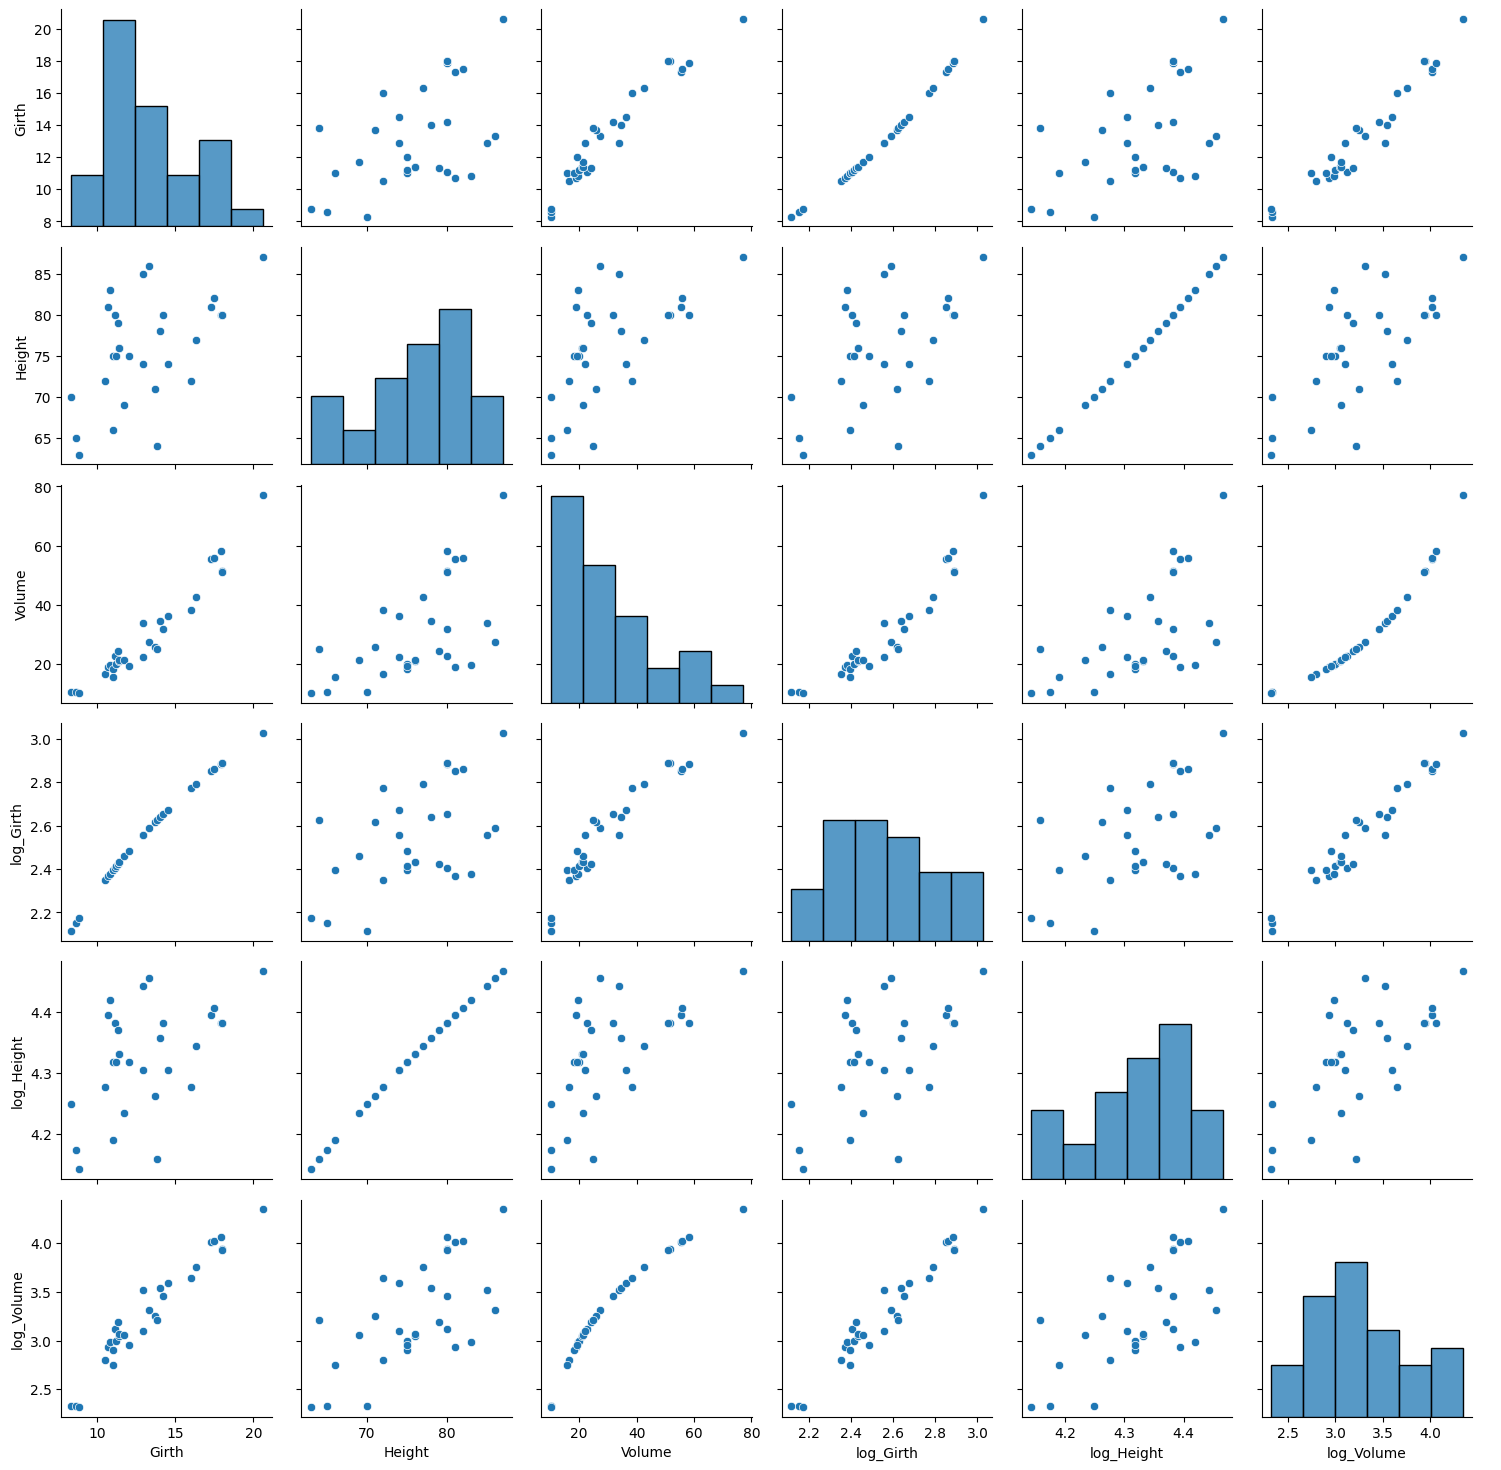

In [ ]:
h = sns.PairGrid(log_trees)
h.map_diag(sns.histplot)
h.map_offdiag(sns.scatterplot)
h.add_legend()

In [ ]:
trans_trees = trees.copy()
trans_trees['cone'] = (np.pi*(trees['Girth']/12)**2*trees['Height'])/12
trans_trees['cylinder'] = (np.pi*(trees['Girth']/12)**2*trees['Height'])/4
trans_trees.head()

,Girth,Height,Volume,cone,cylinder
1,8.3,70.0,10.3,8.767189,26.301566
2,8.6,65.0,10.3,8.740100,26.220300
3,8.8,63.0,10.2,8.869763,26.609290
4,10.5,72.0,16.4,14.431691,43.295074
5,10.7,81.0,18.8,16.860044,50.580133


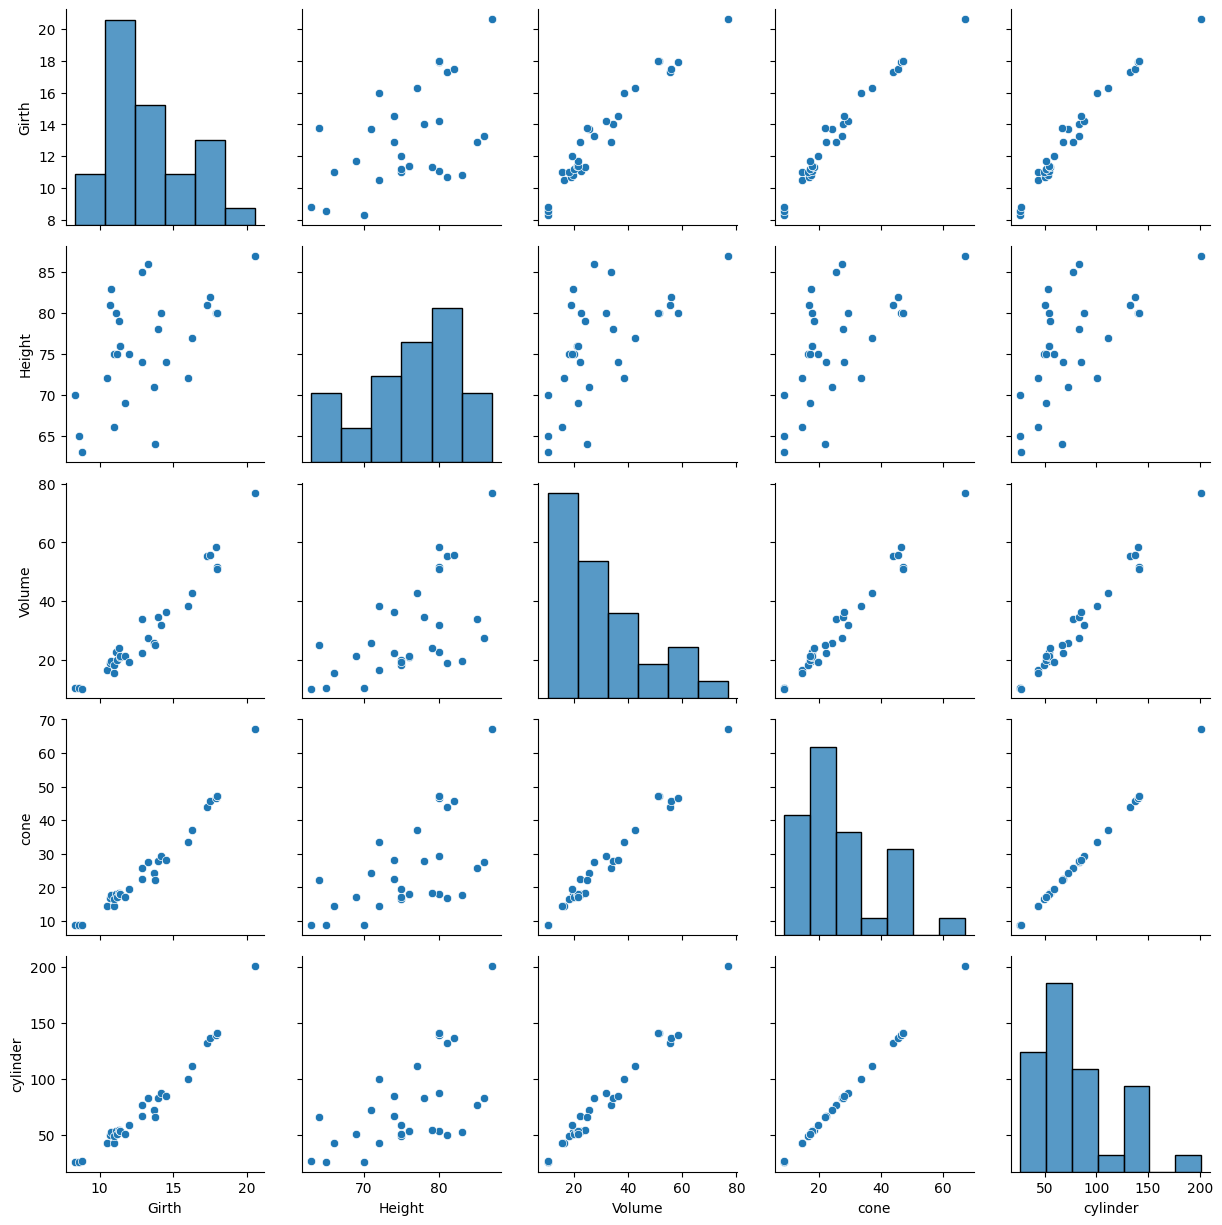

In [ ]:
i = sns.PairGrid(trans_trees)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)

## Classical Regression analysis approach
How we did it last term in 01RAD

### Model 0 lm()

In [ ]:
trees_m0a = smf.ols(formula='log_Volume ~ log_Girth + log_Height', data=log_trees).fit()
print(trees_m0a.summary())


                            OLS Regression Results                            
Dep. Variable:             log_Volume   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     613.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           7.62e-24
Time:                        11:46:55   Log-Likelihood:                 35.356
No. Observations:                  31   AIC:                            -64.71
Df Residuals:                      28   BIC:                            -60.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6316      0.800     -8.292      0.0

If we understand given problem, we can find good linear relation with some advanced transformation of independent varialbes.

In [ ]:
trees_m0b = smf.ols(formula='Volume ~ cone - 1', data=trans_trees).fit()
print(trees_m0b.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5996.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    4.14e-36
Time:                        11:46:55   Log-Likelihood:                         -71.322
No. Observations:                  31   AIC:                                      144.6
Df Residuals:                      30   BIC:                                      146.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
trees_m0c = smf.ols(formula='Volume ~ cylinder - 1', data=trans_trees).fit()
print(trees_m0c.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Volume   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              5996.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):                    4.14e-36
Time:                        11:46:55   Log-Likelihood:                         -71.322
No. Observations:                  31   AIC:                                      144.6
Df Residuals:                      30   BIC:                                      146.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## GLM approach
Since response is continuous nonnegative variable, we use `family = gamma`. In the first approach we try canonical link function, which is for gamma distribution: $g(\mu) = 1/\mu$.

### Model 1 (_m1)

In [ ]:
trees_m1 = smf.glm('Volume ~  Girth + Height', data=trees, family=sm.families.Gamma()).fit()
print(trees_m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:           InversePower   Scale:                        0.041737
Method:                          IRLS   Log-Likelihood:                -96.435
Date:                Tue, 02 Apr 2024   Deviance:                       1.3038
Time:                        11:46:55   Pearson chi2:                     1.17
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9956
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1119      0.017      6.721      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


### Questions:

* What can you say from the `summary()` about the model 0?
* Do you understand to all numbers and do you know how they were computed?

The general formula for deviance:

$$ D = 2 \times (l_{sat} - l_{model}) $$

where $l_{sat}$ is the log-likelihood of the saturated model and $l_{model}$ is the log-likelihood of the fitted model.

### Step 1: Log-likelihood for Gamma Distribution

For a single observation, the log-likelihood function of the Gamma distribution with the shape parameter $\theta$ and scale parameter $\beta$ is given by:

$$ l(y_i; \theta, \beta) = -\log(\Gamma(\theta)) - \theta\log(\beta) + (\theta-1)\log(y_i) - \frac{y_i}{\beta} $$

We have canonical link function (the inverse link) and we assume that the shape parameter $\theta$ is fixed and we are dealing with the mean $\mu$ only.


$$ D = 2 \times \left( \sum_{i=1}^{n} \left( (\theta-1) \cdot (\log(y_i) - \log(\hat{\mu}_i)) - \frac{y_i - \hat{\mu}_i}{\theta \cdot \hat{\mu}_i} \right) \right)$$


$$ D = 2 \times \left( \sum_{i=1}^{n} \left( \frac{y_i - \hat{y}_i}{\hat{y}_i} - \log\frac{y_i}{\hat{y}_i} \right) \right)$$



In [ ]:

# Fitting the model as specified
trees_m1 = smf.glm('Volume ~  Girth + Height', data=trees, family=sm.families.Gamma()).fit()

# Printing the summary
print(trees_m1.summary())

# Calculating the deviance manually
y_hat = trees_m1.predict()
deviance_hand = 2 * np.sum((y - y_hat) / y_hat - np.log(y / y_hat))

# Comparing with statsmodels deviance
deviance_statsmodels = trees_m1.deviance

deviance_statsmodels, deviance_hand


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Volume   No. Observations:                   31
Model:                            GLM   Df Residuals:                       28
Model Family:                   Gamma   Df Model:                            2
Link Function:           InversePower   Scale:                        0.041737
Method:                          IRLS   Log-Likelihood:                -96.435
Date:                Tue, 02 Apr 2024   Deviance:                       1.3038
Time:                        11:46:55   Pearson chi2:                     1.17
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9956
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1119      0.017      6.721      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


(1.3037813806021052, 1.3037813806021052)

### Tasks

* Compute different types of residuals.
* Plot residuals vs. fitted values or regressors
* Validate used ling function with working responses.
* Validate used regressors with Component+Residual, ie Partial Residual Plots

## Residuals
Consider  the GLM from for the observations $Y_1,\ldots,Y_n$ and assume $a_i(\phi) = a_i \phi$, where $a_i>0$ are known for $i=1,\ldots, n$.



From estimation of GLMs as Locally Like Linear Regression by using IRLS we can obtain weights $W$ with  *working responses* and compute *working residuals*.

**Working residuals**
$$e_i = z_i − \hat{\eta_i}$$

**Pearson residuals**

$$ {r_{i}^{P}
=\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{a_i\, v(\hat\mu_i)}}},\qquad
v(\mu_i)= b^{\prime\prime}(\theta_i) \mbox{ for } \theta_i = \theta(\mu_i),
$$

where $v(\mu_i)$ is called a variance function and $V[Y_i] = a_i \phi v(\mu_i)$.
The Pearson residual is the response residual scaled with with the estimated standard deviation for the observation.


**Pearson standartized residuals**

$$
{r_{i}^{PS}
=}\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{\hat{V}[Y_{i}](1-h_{ii})}}
=\frac{y_{i}-\hat{\mu}_{i}}{\sqrt{a_i \hat\phi \, v(\hat\mu_i)(1-h_{ii})}}
={\frac{r_{i}^{P}}{\sqrt{\hat\phi(1-h_{ii})}}},
$$

**Anscombe residuals**

For models, where $a_i(\phi)=1$
$$
{r_{i}^{A}=\frac{A(y_{i})-A(\hat{\mu}_{i})}{\sqrt{\hat{V}[A(y_{i})]}}},\quad i=1,...,n
$$
where
$$
A(y)=\int_{-\infty}^{y}\frac{d\mu}{v^{1/3}(\mu)}.
$$

**Deviance residual**

The deviance residual for the i’th observation is defined as

$$
{r_{i}^{D}=\mbox{sign} (y_{i}-\hat{\mu}_{i})\sqrt{D_{i}}},\quad i=1,...,n,
$$
where
$$
D=\sum_{i=1}^{n}(r_{i}^{D})^{2} = \sum_{i=1}^{n}D_{i}=
\sum_{i=1}^{n}\frac{2}{a_{i}}\left[y_{i}(\tilde{\theta}_{i}-
\hat{\theta}_{i})-\left(b(\tilde{\theta}_{i})-b(\hat{\theta}_{i})\right)\right].
$$


**Deviance standartized residual**
$$
{r_{i}^{DS}=\frac{r_{i}^{D}}{\sqrt{\hat\phi(1-h_{ii})}}},\quad i=1,...,n,
$$

The deviance residuals are the generalization of the residuals from the classical linear model. They are constructed using the analogy between the deviance and the RSS.

Gamma model is necessarily heteroskedastic, because the variance is  proportional to $μ^2$.

In [ ]:
# Residuals
expected = trees_m1.predict(exog=trees)
print(expected)
estimates = trees_m1.fittedvalues
v = estimates**2 # for gamma distribution used in our model with trees dataset
# If we have Poisson distribution, v = estimates, Bernouli v = estimates(1-estimates), ....

1      16.441717
2      16.396985
3      16.463283
4      19.339542
5      20.608704
6      21.008883
7      19.470138
8      20.426392
9      21.172750
10     20.757069
11     21.405133
12     21.218229
13     21.218229
14     20.907585
15     22.194254
16     23.915288
17     25.723138
18     26.991631
19     25.318968
20     24.404388
21     27.430254
22     28.456088
23     28.109667
24     33.047014
25     36.030513
26     43.886498
27     46.000320
28     48.277761
29     49.204089
30     49.204089
31    120.271403
dtype: float64


In [ ]:
# Response residuals
r_response1 = trees_m1.resid_response
r_response2 = expected - estimates
df = pd.DataFrame(r_response1)
df['r_response2'] = r_response2
df

,0,r_response2
1,-6.141717,0.0
2,-6.096985,0.0
3,-6.263283,0.0
4,-2.939542,0.0
5,-1.808704,0.0
6,-1.308883,0.0
7,-3.870138,0.0
8,-2.226392,0.0
9,1.427250,0.0
10,-0.857069,0.0


In [ ]:
# Working residuals
r_working1 = trees_m1.resid_working
r_working2 = (expected - estimates) / v
df['r_working1'] = r_working1
df['r_working2'] = r_working2
df

,0,r_response2,r_working1,r_working2
1,-6.141717,0.0,0.022719,0.0
2,-6.096985,0.0,0.022677,0.0
3,-6.263283,0.0,0.023108,0.0
4,-2.939542,0.0,0.007859,0.0
5,-1.808704,0.0,0.004259,0.0
6,-1.308883,0.0,0.002965,0.0
7,-3.870138,0.0,0.010209,0.0
8,-2.226392,0.0,0.005336,0.0
9,1.427250,0.0,-0.003184,0.0
10,-0.857069,0.0,0.001989,0.0


In [ ]:
# Pearson residuals
r_pearson1 = trees_m1.resid_pearson # Pearson residuals from resid() function
r_pearson2 = (expected - estimates) / np.sqrt(v)    # Pearson residuals from above definitionf for gamma
df['r_pearson1'] = r_pearson1
df['r_pearson2'] = r_pearson2
df

,0,r_response2,r_working1,r_working2,r_pearson1,r_pearson2
1,-6.141717,0.0,0.022719,0.0,-0.373545,0.0
2,-6.096985,0.0,0.022677,0.0,-0.371836,0.0
3,-6.263283,0.0,0.023108,0.0,-0.380439,0.0
4,-2.939542,0.0,0.007859,0.0,-0.151996,0.0
5,-1.808704,0.0,0.004259,0.0,-0.087764,0.0
6,-1.308883,0.0,0.002965,0.0,-0.062301,0.0
7,-3.870138,0.0,0.010209,0.0,-0.198773,0.0
8,-2.226392,0.0,0.005336,0.0,-0.108996,0.0
9,1.427250,0.0,-0.003184,0.0,0.067410,0.0
10,-0.857069,0.0,0.001989,0.0,-0.041290,0.0


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Pearson Residuals
def pearson_residuals(model):
    Y_obs = model.model.endog
    mu = model.fittedvalues
    V = model.family.variance(mu)
    return (Y_obs - mu) / np.sqrt(V)

# Deviance Residuals
def deviance_residuals(model):
    return model.resid_deviance

# Working Residuals
def working_residuals(model):
    return model.resid_working

# Response Residuals
def response_residuals(model):
    Y_obs = model.model.endog
    mu = model.fittedvalues
    return Y_obs - mu

# Standardized Deviance Residuals
def standardized_deviance_residuals(model):
    return model.resid_pearson

# Compare Residuals
def compare_residuals(model):
    df = pd.DataFrame({
        "Original_Values": model.model.endog,
        "Predicted_Values": model.fittedvalues,
        "Pearson_Residuals": pearson_residuals(model),
        "Deviance_Residuals": deviance_residuals(model),
        "Working_Residuals": working_residuals(model),
        "Response_Residuals": response_residuals(model),
        "Standardized_Deviance_Residuals": standardized_deviance_residuals(model),
    })
    return df




In [ ]:
residuals_df = compare_residuals(trees_m1)
residuals_df

,Original_Values,Predicted_Values,Pearson_Residuals,Deviance_Residuals,Working_Residuals,Response_Residuals,Standardized_Deviance_Residuals
1,10.3,16.441717,-0.373545,-0.433897,0.022719,-6.141717,-0.373545
2,10.3,16.396985,-0.371836,-0.431550,0.022677,-6.096985,-0.371836
3,10.2,16.463283,-0.380439,-0.443408,0.023108,-6.263283,-0.380439
4,16.4,19.339542,-0.151996,-0.160462,0.007859,-2.939542,-0.151996
5,18.8,20.608704,-0.087764,-0.090472,0.004259,-1.808704,-0.087764
6,19.7,21.008883,-0.062301,-0.063644,0.002965,-1.308883,-0.062301
7,15.6,19.470138,-0.198773,-0.213719,0.010209,-3.870138,-0.198773
8,18.2,20.426392,-0.108996,-0.113228,0.005336,-2.226392,-0.108996
9,22.6,21.172750,0.067410,0.065952,-0.003184,1.427250,0.067410
10,19.9,20.757069,-0.041290,-0.041873,0.001989,-0.857069,-0.041290


In [ ]:
def compute_residuals(model):
    # Assumed inputs and preliminary calculations
    Y_obs = model.model.endog
    mu_hat = model.fittedvalues
    phi_hat = model.scale
    var_weights = model.model.var_weights if model.model.var_weights is not None else np.ones_like(Y_obs)
    V = model.family.variance(mu_hat)

    # Compute leverage values
    influence = model.get_influence(observed=False)  # Adjust as necessary for your model
    h_ii = influence.hat_matrix_diag  # Leverage values

    # Working Residuals
    working_residuals = model.resid_working

    # Pearson Residuals
    pearson_residuals = (Y_obs - mu_hat) / np.sqrt(var_weights * V)

    # Pearson Standardized Residuals
    pearson_standardized_residuals = pearson_residuals / np.sqrt(phi_hat * (1 - h_ii))

    # Deviance Residuals
    deviance_residuals = model.resid_deviance

    # Deviance Standardized Residuals
    deviance_standardized_residuals = deviance_residuals / np.sqrt(phi_hat * (1 - h_ii))

    # Compile into a DataFrame
    residuals_df = pd.DataFrame({
        "Original_Values": Y_obs,
        "Predicted_Values": mu_hat,
        "Working_Residuals": working_residuals,
        "Pearson_Residuals": pearson_residuals,
        "Pearson_Standardized_Residuals": pearson_standardized_residuals,
        "Deviance_Residuals": deviance_residuals,
        "Deviance_Standardized_Residuals": deviance_standardized_residuals
    })

    return residuals_df



In [ ]:
residuals_df = compute_residuals(trees_m1)
residuals_df

,Original_Values,Predicted_Values,Working_Residuals,Pearson_Residuals,Pearson_Standardized_Residuals,Deviance_Residuals,Deviance_Standardized_Residuals
1,10.3,16.441717,0.022719,-0.373545,-1.875256,-0.433897,-2.178233
2,10.3,16.396985,0.022677,-0.371836,-1.874979,-0.431550,-2.176090
3,10.2,16.463283,0.023108,-0.380439,-1.930384,-0.443408,-2.249893
4,16.4,19.339542,0.007859,-0.151996,-0.760343,-0.160462,-0.802690
5,18.8,20.608704,0.004259,-0.087764,-0.452029,-0.090472,-0.465974
6,19.7,21.008883,0.002965,-0.062301,-0.326208,-0.063644,-0.333240
7,15.6,19.470138,0.010209,-0.198773,-1.009824,-0.213719,-1.085756
8,18.2,20.426392,0.005336,-0.108996,-0.545802,-0.113228,-0.566997
9,22.6,21.172750,-0.003184,0.067410,0.343950,0.065952,0.336512
10,19.9,20.757069,0.001989,-0.041290,-0.206619,-0.041873,-0.209534


In [ ]:
trees_modeled = trees.copy()

In [ ]:
!pip install plotnine

In [ ]:
from plotnine import ggplot, aes, geom_line, geom_smooth, geom_abline, geom_point, labs, geom_qq_line, geom_qq
%matplotlib inline

In [ ]:
trees['fitted'] = trees_m1.fittedvalues

/usr/local/lib/python3.10/dist-packages/plotnine/stats/smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


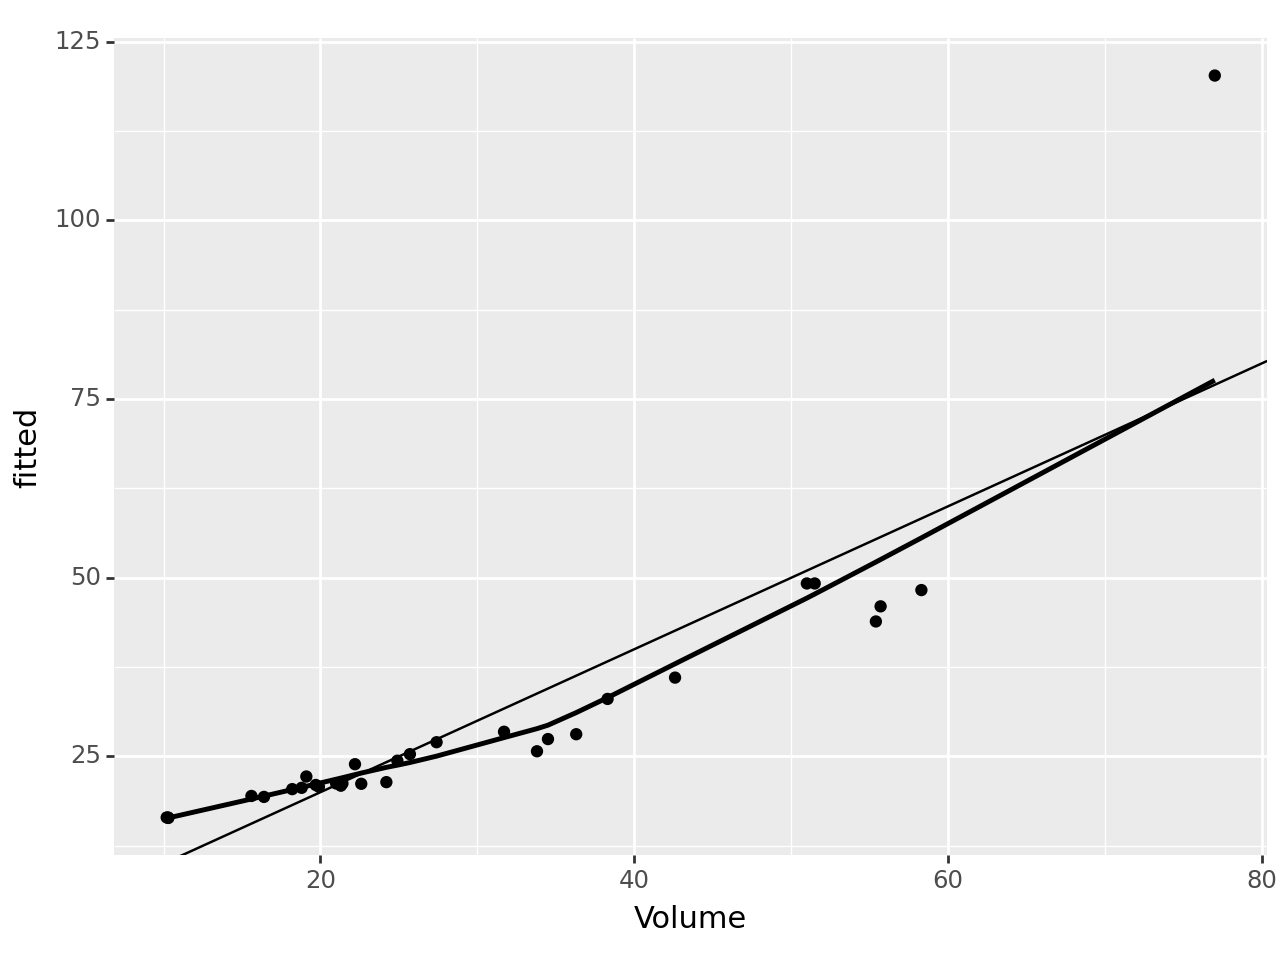

<Figure Size: (640 x 480)>

In [ ]:
ggplot(trees, aes(x = 'Volume', y = 'fitted')) + \
      geom_smooth()+ \
      geom_point() + \
      geom_abline(intercept = 0, slope = 1)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpWolyCw/downloaded_packages’



`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


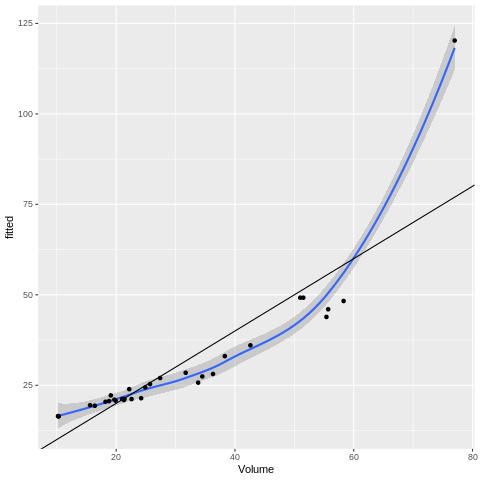

In [ ]:
%%R -o trees_modeled
library("tidyverse")
trees_m1 <- glm( Volume ~ Girth + Height, data=trees, family=Gamma)
summary(trees_m1)

expected  <- trees_m1$y
estimates <- trees_m1$fitted.values
v         <- estimates^2 # for gamma distribution used in our model with trees dataset
# If we have Poisson distribution: v = estimates,
# If Bernouli: v = estiamtes(1-estimates), ...

r_response1 <- residuals(trees_m1, type="response")
r_response2 <- (expected - estimates)
head(cbind(r_response1,r_response2))

# Working residuals
r_working1 <- residuals(trees_m1, type="working")
r_working2 <- (expected - estimates) / v
r_working3 <- trees_m1$residuals
head(cbind(r_working1,r_working2,r_working3))

# Pearson residuals
r_pearson1 <- residuals(trees_m1, type="pearson") # Pearson residuals from resid() function
r_pearson2 <- (expected - estimates) / sqrt(v)    # Pearson residuals from above definitionf for gamma
head(cbind(r_pearson1,r_pearson2))

# Pearson standartized residuals
r_pearson_std1 <- rstandard(trees_m1, type = "pearson")

# compute estimation of dispersion parametr phi by hand and from summary function
w <- weights(trees_m1, type="working")
e <- residuals(trees_m1, type="working")
phi_est_hand <- sum(w * e^2) /df.residual(trees_m1)
phi_est <- summary(trees_m1)$dispersion # Pearsons estiamtes of phi
cbind(phi_est_hand, phi_est)
# Pearson standartized residuals by hand
r_pearson_std2 <- r_pearson2 / sqrt(phi_est*(1 - hatvalues(trees_m1)) )
head(cbind(r_pearson_std1,r_pearson_std2))

# Deviance residuals
r_deviance <- resid(trees_m1 )
r_deviance_std <- rstandard(trees_m1) # Standart
head(cbind(r_deviance,r_deviance_std))
? rstandard

trees_modeled <- trees %>%
  mutate(fitted = trees_m1$fitted.values,
         r_deviance_std =rstandard(trees_m1, type = "deviance"),
         r_pearson_std = rstandard(trees_m1, type = "pearson") )
head(trees_modeled)

library(ggplot2)
install.packages("gridExtra")
library(gridExtra)

p <- ggplot(trees_modeled, aes(x = Volume,y = fitted)) +
      geom_smooth()+
      geom_point() +
      geom_abline(intercept = 0, slope = 1)
p

Plots of the residuals against the fitted values $\mu$ and the residuals against
$x_j$ are the main tools for diagnostic analysis. Using deviance residuals is preferred in these plots because they have approximately constant variance.

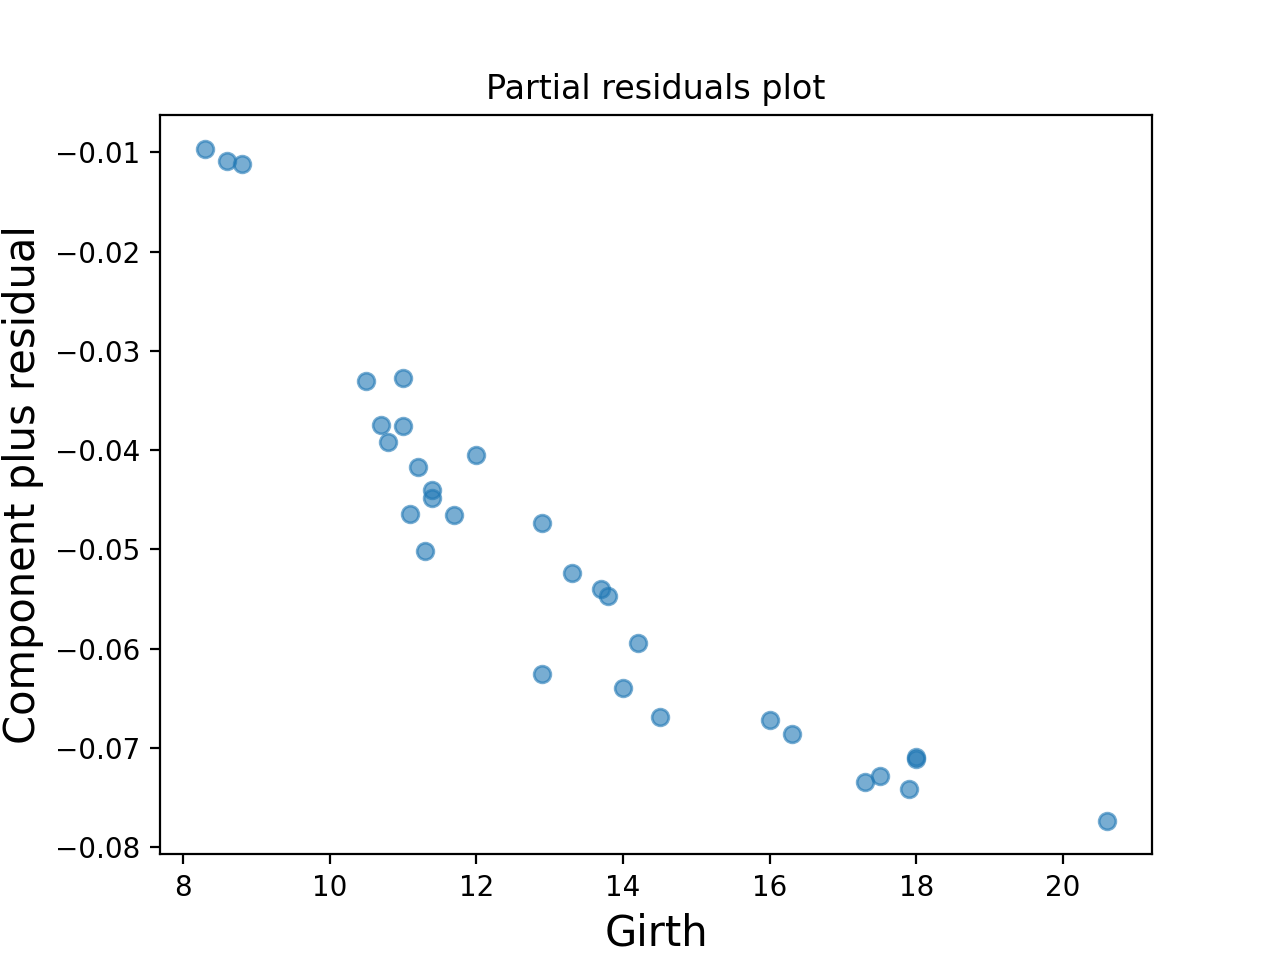

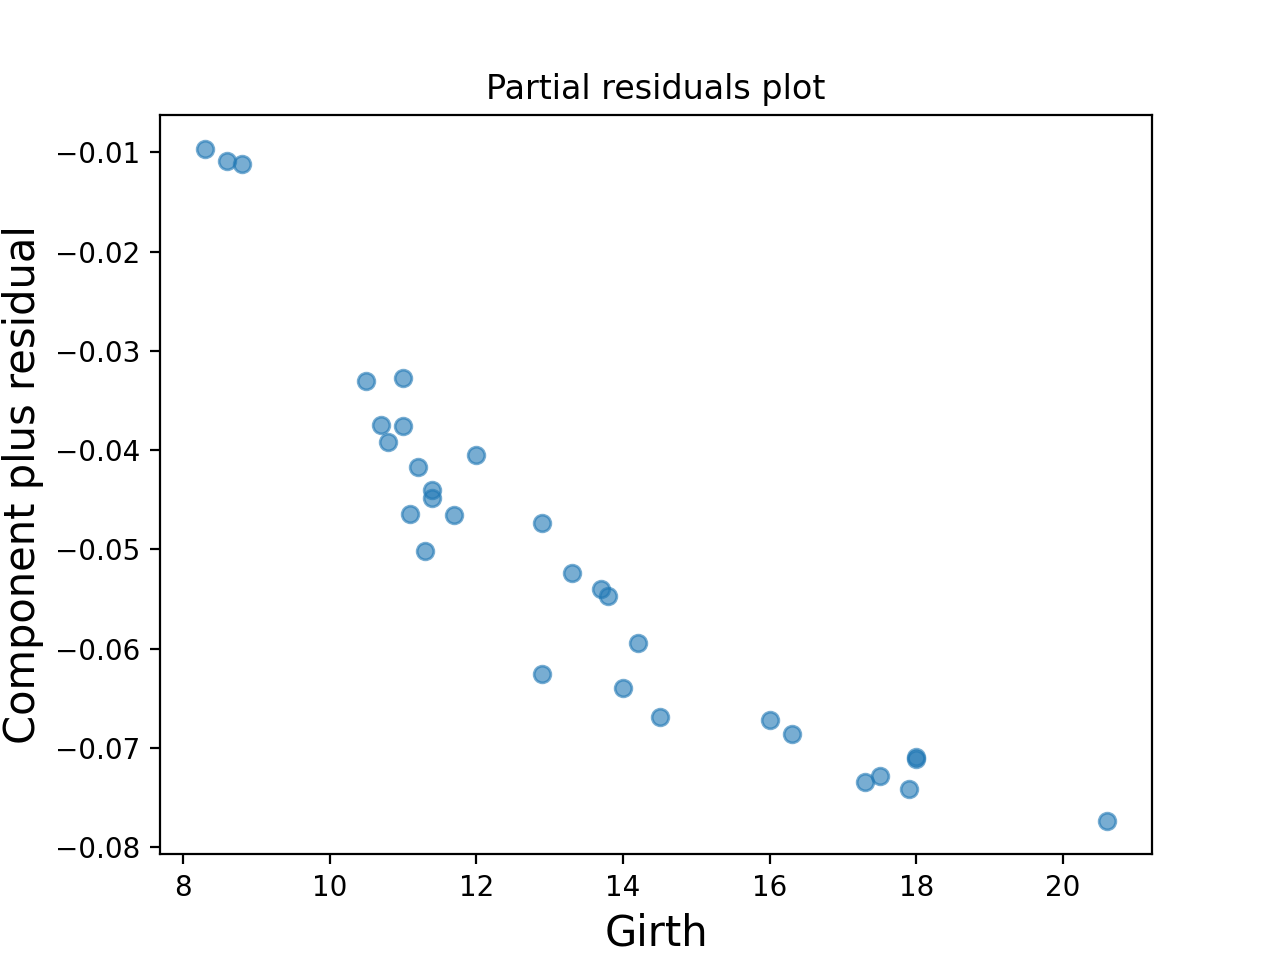

In [ ]:
trees_m1.plot_partial_residuals('Girth')

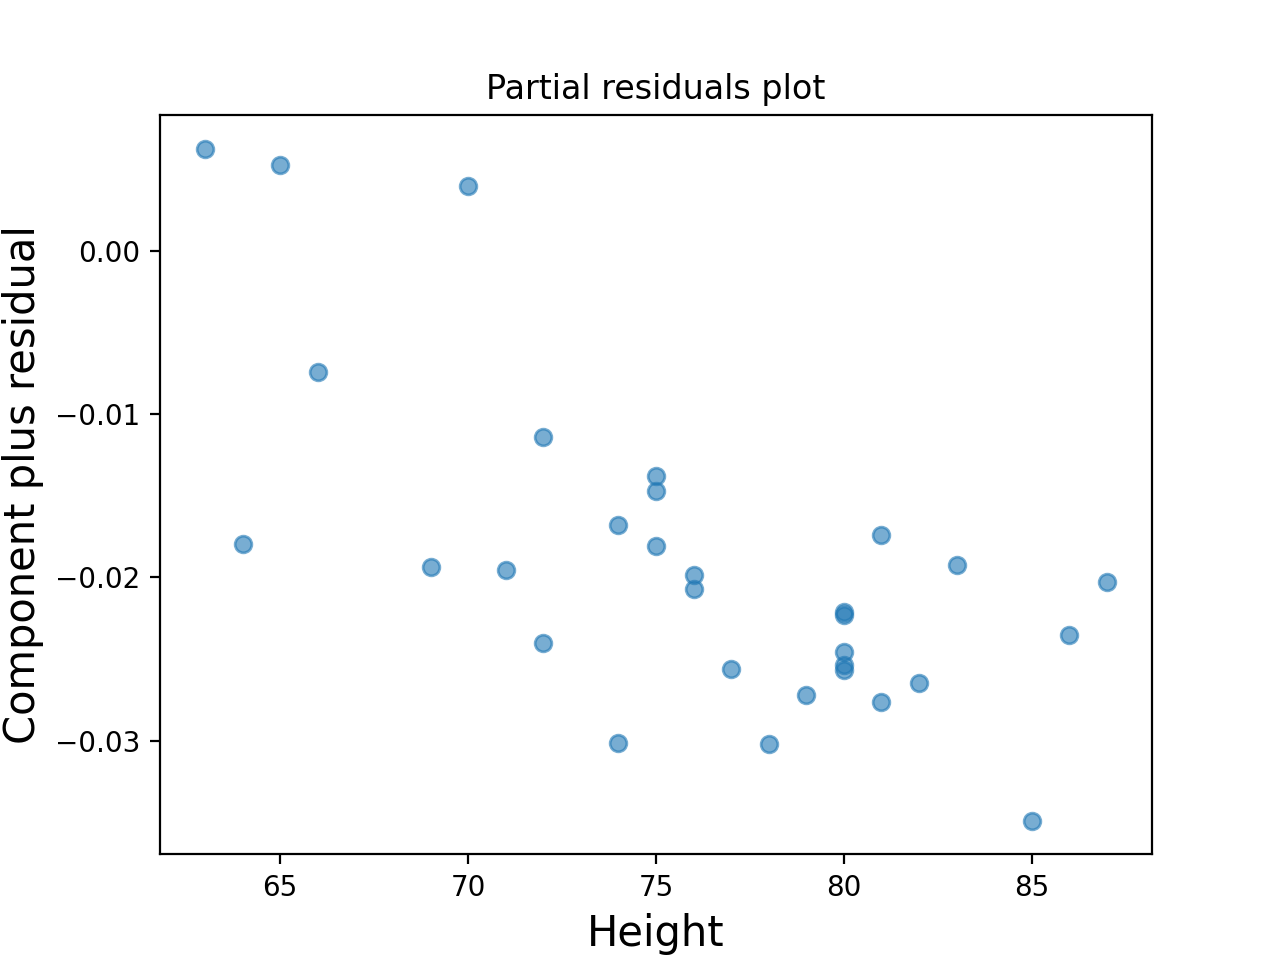

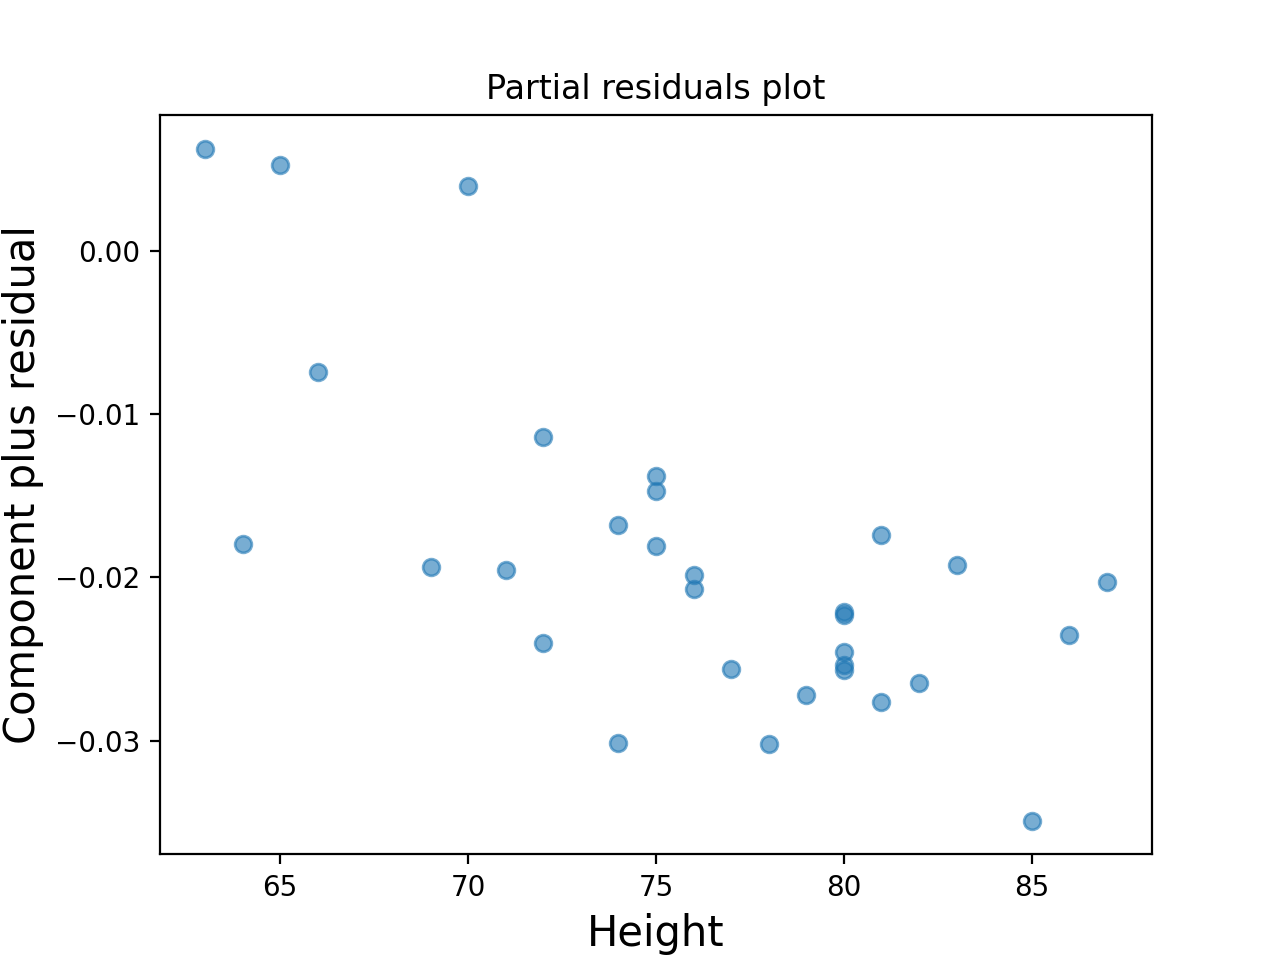

In [ ]:

trees_m1.plot_partial_residuals('Height')

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


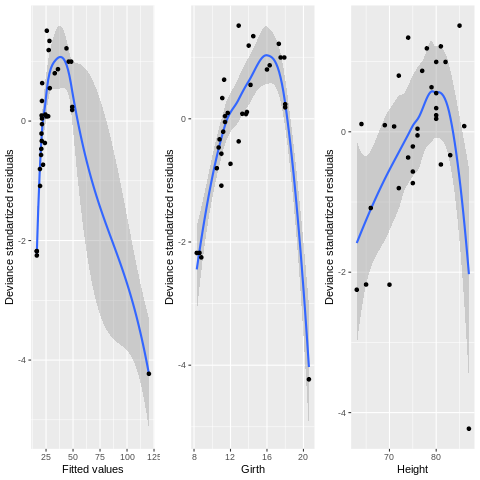

In [ ]:
%%R
par(mfrow=c(2,3))
p1<-ggplot(trees_modeled, aes(x = fitted, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")
p2<-ggplot(trees_modeled, aes(x = Girth, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
p3<-ggplot(trees_modeled, aes(x = Height, y = r_deviance_std)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
grid.arrange(p1, p2, p3, ncol = 3)


If the evidence shows problems with the systematic component, then the
cause may be an incorrect link function, or an incorrect linear predictor (for
example, important explanatory variables are missing, or covariates should
be transformed), or both.

*Working responses* $z_i = \hat\eta_i + g^\prime(\hat\mu_i) (y_i-\hat\mu_i)$
 can be determined from working residuals, obtained by the function `resid(model, type="working")`.

 We plot Working responses against predicted values of linear predictor $\hat\eta_i$.


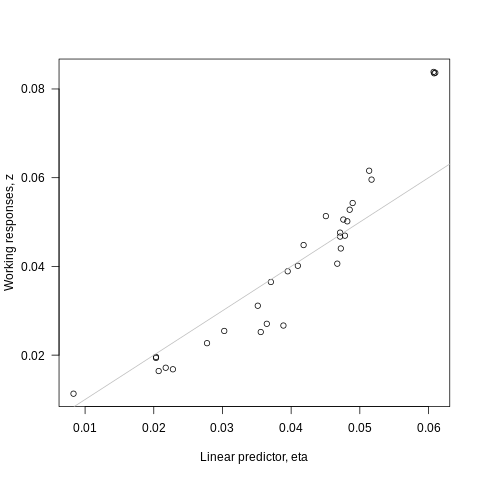

In [ ]:
%%R
eta <- trees_m1$linear.predictor
z  <- resid(trees_m1, type="working") + eta
plot( z ~ eta, las=1,
        xlab="Linear predictor, eta", ylab="Working responses, z")
abline(0, 1, col="grey")

To determine if covariate $x_j$ is included on the incorrect scale, use partial
residuals
$$ u_j = e_i + \hat{\beta}_j x_j.$$
In R use function `resid(fit, type="partial")`.

Component+Residual (Partial Residual plot, ie. $x_j$ against $j$th partial residuals) can be plotted by function `termplot()` or `crPlots()` from the library `cars`

In [ ]:
%%R
trees_modeled <- trees_modeled %>%
mutate(Partial_for_Girth = as.data.frame(resid(trees_m1, type="partial"))$Girth,
        Partial_for_Height = as.data.frame(resid(trees_m1, type="partial"))$Height)
summary(trees_modeled)

     Girth           Height       Volume          fitted      
 Min.   : 8.30   Min.   :63   Min.   :10.20   Min.   : 16.40  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40   1st Qu.: 20.83  
 Median :12.90   Median :76   Median :24.20   Median : 23.92  
 Mean   :13.25   Mean   :76   Mean   :30.17   Mean   : 30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30   3rd Qu.: 30.75  
 Max.   :20.60   Max.   :87   Max.   :77.00   Max.   :120.27  
 r_deviance_std     r_pearson_std      Partial_for_Girth   Partial_for_Height  
 Min.   :-4.22963   Min.   :-3.66575   Min.   :-0.025677   Min.   :-1.461e-02  
 1st Qu.:-0.51648   1st Qu.:-0.49891   1st Qu.:-0.015393   1st Qu.:-5.201e-03  
 Median : 0.08057   Median : 0.08097   Median : 0.001498   Median : 5.266e-05  
 Mean   :-0.13507   Mean   :-0.05613   Mean   : 0.001255   Mean   : 1.255e-03  
 3rd Qu.: 0.71726   3rd Qu.: 0.75105   3rd Qu.: 0.011831   3rd Qu.: 3.228e-03  
 Max.   : 1.51200   Max.   : 1.65949   Max.   : 0.042016   Max.   : 2.658e-02  

`geom_smooth()` using formula = 'y ~ x'


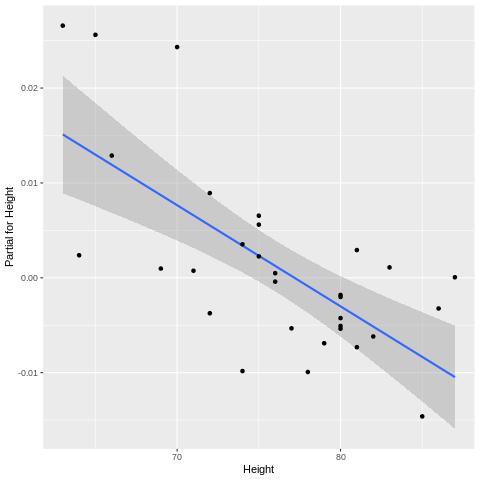

In [ ]:
%%R
ggplot(trees_modeled, aes(x = Girth, y = Partial_for_Girth)) +
  geom_smooth(method = lm) +
  geom_point() +
  labs(y = "Partial for Girth",
       x = "Girth")

 ggplot(trees_modeled, aes(x = Height, y = Partial_for_Height)) +
  geom_smooth(method = lm) +
  geom_point() +
  labs(y = "Partial for Height",
       x = "Height")

File: /tmp/RtmpWolyCw/Rtxt4aa4555f883
termplot                 package:stats                 R Documentation



_P_l_o_t _R_e_g_r_e_s_s_i_o_n _T_e_r_m_s



_D_e_s_c_r_i_p_t_i_o_n:



     Plots regression terms against their predictors, optionally with

     standard errors and partial residuals added.



_U_s_a_g_e:



     termplot(model, data = NULL, envir = environment(formula(model)),

              partial.resid = FALSE, rug = FALSE,

              terms = NULL, se = FALSE,

              xlabs = NULL, ylabs = NULL, main = NULL,

              col.term = 2, lwd.term = 1.5,

              col.se = "orange", lty.se = 2, lwd.se = 1,

              col.res = "gray", cex = 1, pch = par("pch"),

              col.smth = "darkred", lty.smth = 2, span.smth = 2/3,

              ask = dev.interactive() && nb.fig < n.tms,

              use.factor.levels = TRUE, smooth = NULL, ylim = "common",

              plot = TRUE, transform.x = FALSE, ...)

     



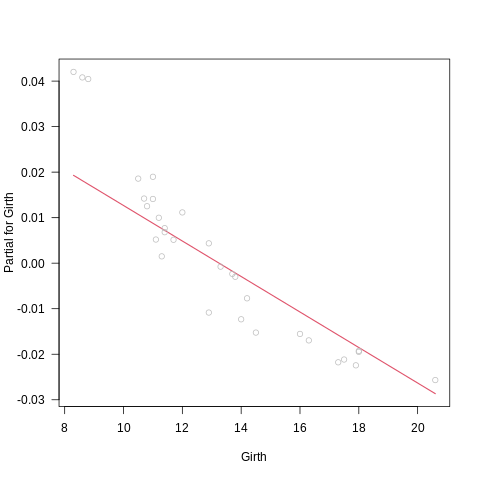

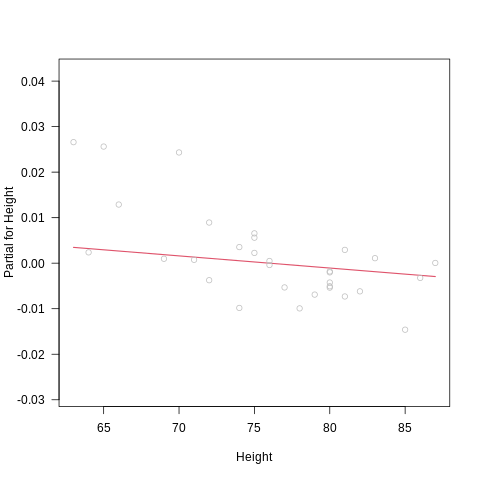

In [ ]:
%%R
termplot(trees_m1, partial.resid=TRUE, las=1)
?termplot


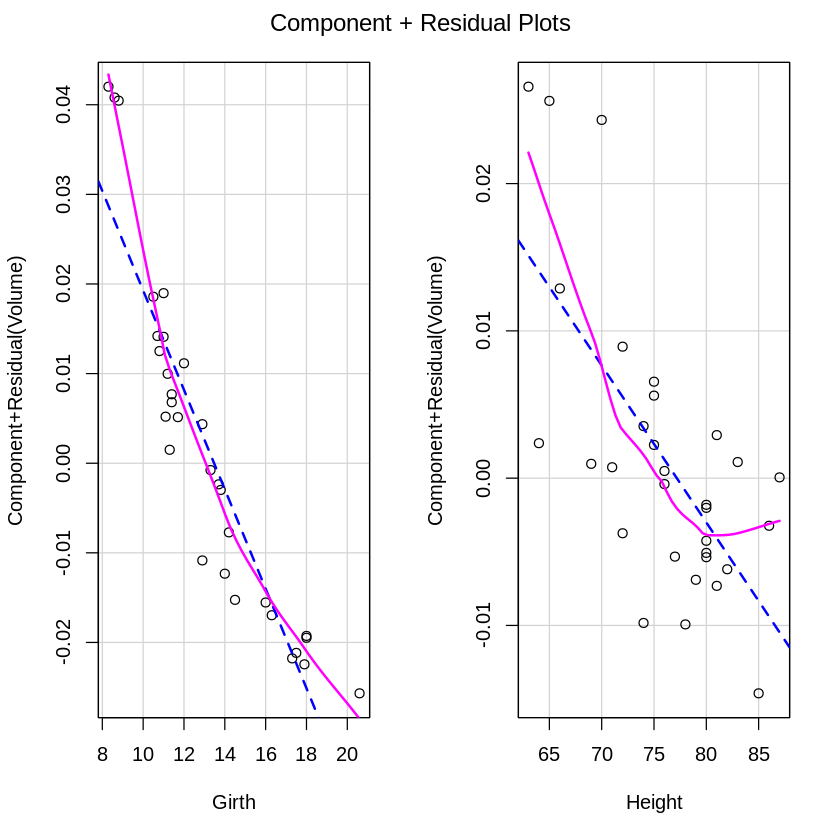

In [ ]:
%%R
install.packages("car")
library(car)
#? crPlot
crPlots(trees_m1)

Link function is not choose correctly. Try another link function.

### Model 2 (_m2)

Let's try gamma distribution with link function $g(\mu)=\log \mu$.

In [ ]:
%%R
trees_m2 <- update(trees_m1, family=Gamma(link="log"))
summary(trees_m2)
#printCoefmat(coef(summary(trees_m2)))


Call:
glm(formula = Volume ~ Girth + Height, family = Gamma(link = "log"), 
    data = trees)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.092305   0.215868   0.428    0.672    
Girth       0.145281   0.006604  21.999  < 2e-16 ***
Height      0.016578   0.003252   5.097 2.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.009410213)

    Null deviance: 8.31720  on 30  degrees of freedom
Residual deviance: 0.26247  on 28  degrees of freedom
AIC: 151.01

Number of Fisher Scoring iterations: 4




Similar plots and analysis we did with model 01.

In [ ]:
%%R
trees_modeled<- trees_modeled %>%
  mutate(fitted2 = trees_m2$fitted.values,
         r_deviance_std2 =rstandard(trees_m2, type = "deviance"),
         r_pearson_std2= rstandard(trees_m2, type = "pearson") )
head(trees_modeled)

  Girth Height Volume   fitted r_deviance_std r_pearson_std Partial_for_Girth
1   8.3     70   10.3 16.44172     -2.1782332    -1.8752563        0.04201589
2   8.6     65   10.3 16.39698     -2.1760896    -1.8749792        0.04080377
3   8.8     63   10.2 16.46328     -2.2498930    -1.9303841        0.04045514
4  10.5     72   16.4 19.33954     -0.8026900    -0.7603428        0.01857688
5  10.7     81   18.8 20.60870     -0.4659741    -0.4520289        0.01419620
6  10.8     83   19.7 21.00888     -0.3332398    -0.3262080        0.01251313
  Partial_for_Height  fitted2 r_deviance_std2 r_pearson_std2
1        0.024322282 11.68832      -1.3576318     -1.3021782
2        0.025615830 11.23782      -0.9588298     -0.9315761
3        0.026581430 11.19185      -1.0383346     -1.0069491
4        0.008927998 16.63260      -0.1493268     -0.1486283
5        0.002922797 19.87816      -0.6073893     -0.5962548
6        0.001095366 20.84900      -0.6300365     -0.6182986


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


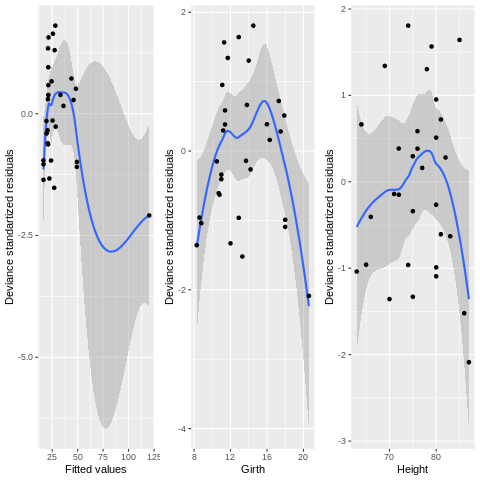

In [ ]:
%%R
par(mfrow=c(2,3))
p1<-ggplot(trees_modeled, aes(x = fitted, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")
p2<-ggplot(trees_modeled, aes(x = Girth, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
p3<-ggplot(trees_modeled, aes(x = Height, y = r_deviance_std2)) +
  geom_smooth() +
  geom_point() +
  labs(y = "Deviance standartized residuals")
grid.arrange(p1, p2, p3, ncol = 3)

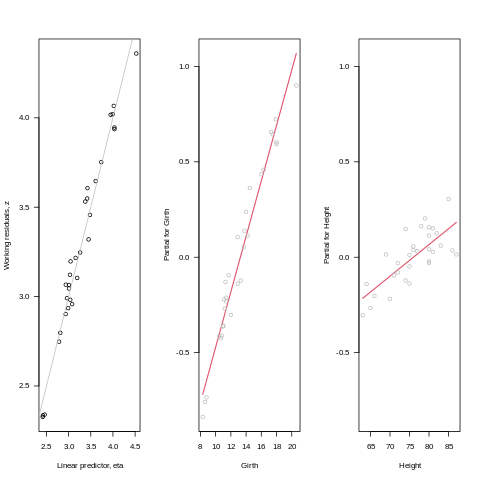

In [ ]:
%%R
par(mfrow=c(1,3))
eta <-trees_m2$linear.predictor
z <- resid(trees_m2, type="working") + eta
plot( z ~ eta, las=1, las=1,
        xlab="Linear predictor, eta", ylab="Working residuals, z")
abline(0, 1, col="grey")
termplot(trees_m2, partial.resid=TRUE, las=1)

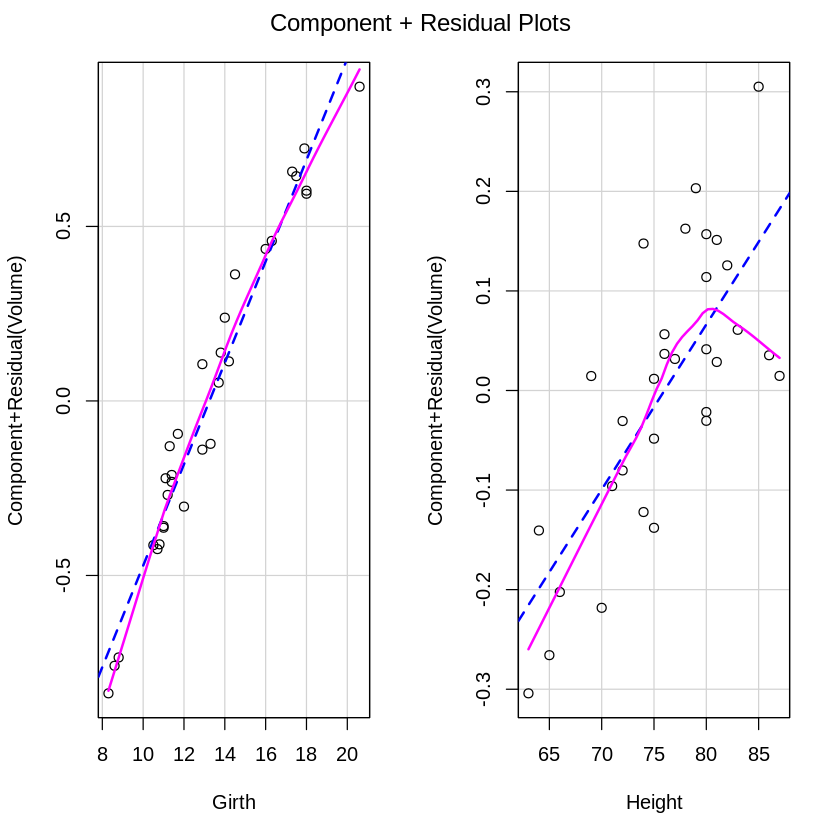

In [ ]:
%%R
crPlots(trees_m2)

We have correct link function, but we still have  problems with  systematic component and residual plots. Lets try some transformations of covariates.

### Model 3 (_m3)

We use log transformation of both $x_j$'s.

In [ ]:
%%R
trees_m3 <- glm( Volume ~ log(Girth) + log(Height),
                    family=Gamma(link=log), data=trees)
#summary(trees_m3)
printCoefmat(coef(summary(trees_m3)))

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -6.69111    0.78784 -8.4929 3.108e-09 ***
log(Girth)   1.98041    0.07389 26.8021 < 2.2e-16 ***
log(Height)  1.13288    0.20138  5.6255 5.037e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


All covariates are significant in the model.



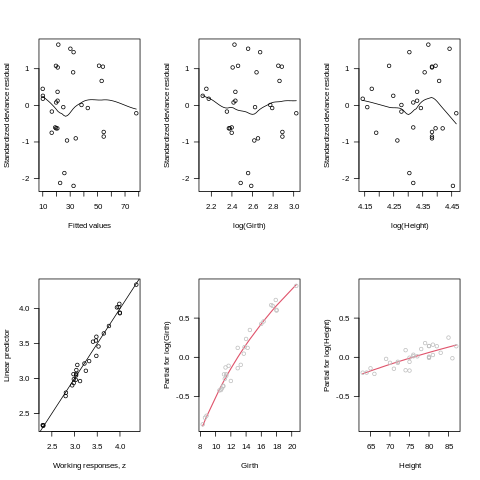

In [ ]:
%%R
par(mfrow=c(2,3))

scatter.smooth( rstandard(trees_m3) ~ fitted(trees_m3), las=1,
                  ylab="Standardized deviance residual", xlab="Fitted values" )
scatter.smooth( rstandard(trees_m3) ~ log(trees$Girth), las=1,
                  ylab="Standardized deviance residual", xlab="log(Girth)" )
scatter.smooth( rstandard(trees_m3) ~ log(trees$Height), las=1,
                  ylab="Standardized deviance residual", xlab="log(Height)" )

z <- resid(trees_m3, type="working") +trees_m3$linear.predictor
plot( z ~trees_m3$linear.predictor, las=1,
        xlab="Working responses, z", ylab="Linear predictor")
abline(0, 1) # Adds line of equality

termplot(trees_m3, partial.resid=TRUE, las=1)

Model 3 is sufficient :-)

Lets check AIC statistics for all three models.

In [ ]:
%%R
AIC <- c(trees_m1$aic,trees_m2$aic,trees_m3$aic)
names(AIC) <- c("AIC.1", "AIC.2", "AIC.3")
AIC

   AIC.1    AIC.2    AIC.3 
200.8706 151.0081 139.9014 


### Question:

* Why  we chose log transformation?
* Are residuals from the model 3 normal?

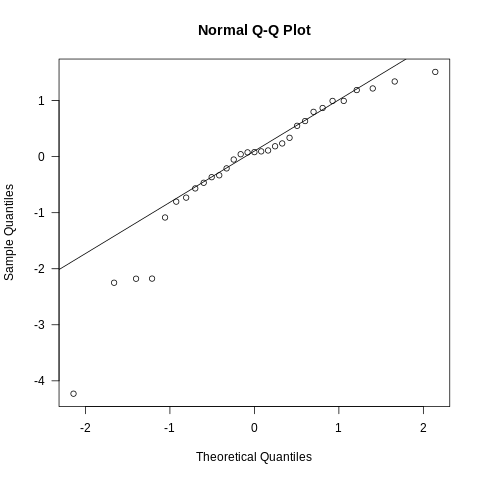

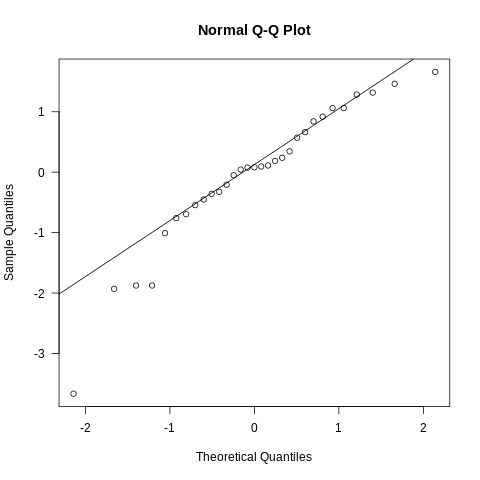

In [ ]:
%%R

# Deviance residauls
qqnorm(r_deviance_std, las=1 )
qqline(r_deviance_std)
# Deviance residauls
qqnorm(r_pearson_std2, las=1 )
qqline(r_pearson_std2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘spatstat.data’, ‘spatstat.utils’, ‘deldir’, ‘polyclip’, ‘sp’, ‘xtable’, ‘polyCub’, ‘spatstat.geom’


Loading required package: sp

Loading required package: xtable

This is surveillance 1.22.1; see ‘package?surveillance’ or
https://surveillance.R-Forge.R-project.org/ for an overview.


Attaching package: ‘surveillance’


The following object is masked from ‘package:lubridate’:

    year




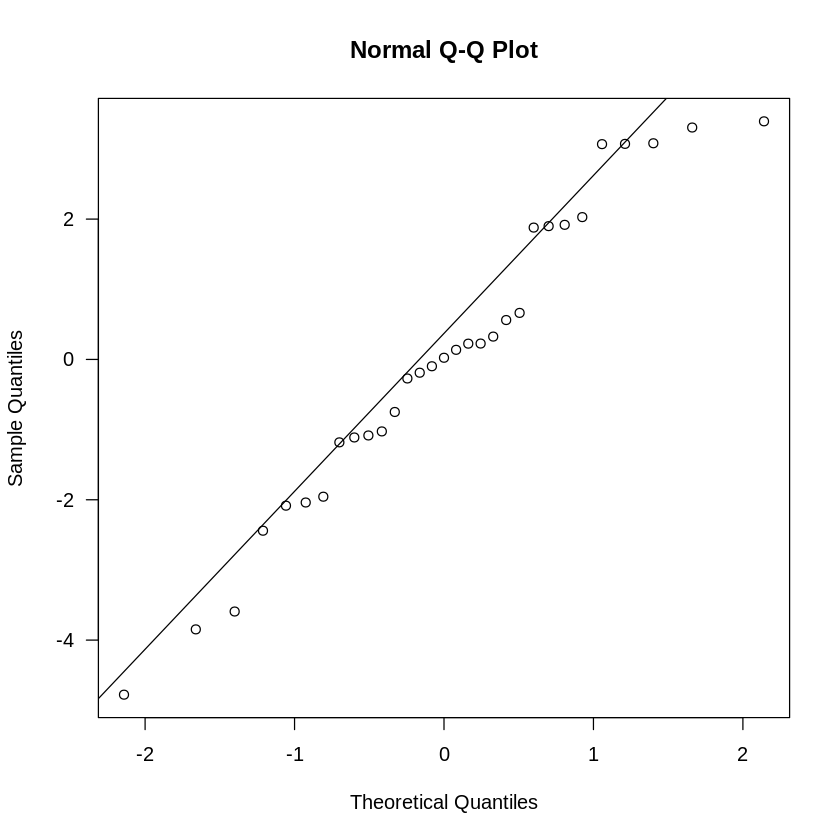

In [ ]:
%%R

install.packages('surveillance')
library(surveillance)
r_anscombe <- anscombe.residuals(trees_m3, summary(trees_m1)$dispersion)
qqnorm(r_anscombe, las=1 )
qqline(r_anscombe)


Check normality with test

In [ ]:
%%R

install.packages("nortest")
library(nortest)
lillie.test(r_anscombe)
shapiro.test(r_anscombe)

lillie.test(r_deviance_std)
shapiro.test(r_deviance_std)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Lilliefors (Kolmogorov-Smirnov) normality test

data:  r_anscombe
D = 0.099851, p-value = 0.5996



	Shapiro-Wilk normality test

data:  r_anscombe
W = 0.96362, p-value = 0.3625



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  r_deviance_std
D = 0.13964, p-value = 0.1284



	Shapiro-Wilk normality test

data:  r_deviance_std
W = 0.88355, p-value = 0.00287


## Influence  Measures

Measures of influence can be computed using the same R functions
as for linear regression models:

• Cook’s distance D: `cooks.distance(model)`.

• dfbetas:  `dfbetas(model)`.

• dffits: `dffits(model)`.

• Covariance ratio cr: `covratio(model)`.

All these measures of influence, together with the leverages $h$, are returned using `influence.measures(model)`.

**Cook distance**

Let $\hat\beta_{(-i)}$ denotes estimation of $\beta$ computed without observation  $i$. Cook distance for $i$th observation is defined by
$$CD_i = \frac{1}{p} \left(\hat\beta - \hat\beta_{(-i)}\right)^T X^T W^{-1} X \left(\hat\beta - \hat\beta_{(-i)}\right)$$
but its computed by
$$
CD_i = \frac{1}{p} \left( r_i^{PS}\right)^2 \frac{h_{ii}}{1-h_{ii}}
$$
and observation is influence if
$$
CD_i \ > \ \frac{8}{n-2p}
$$

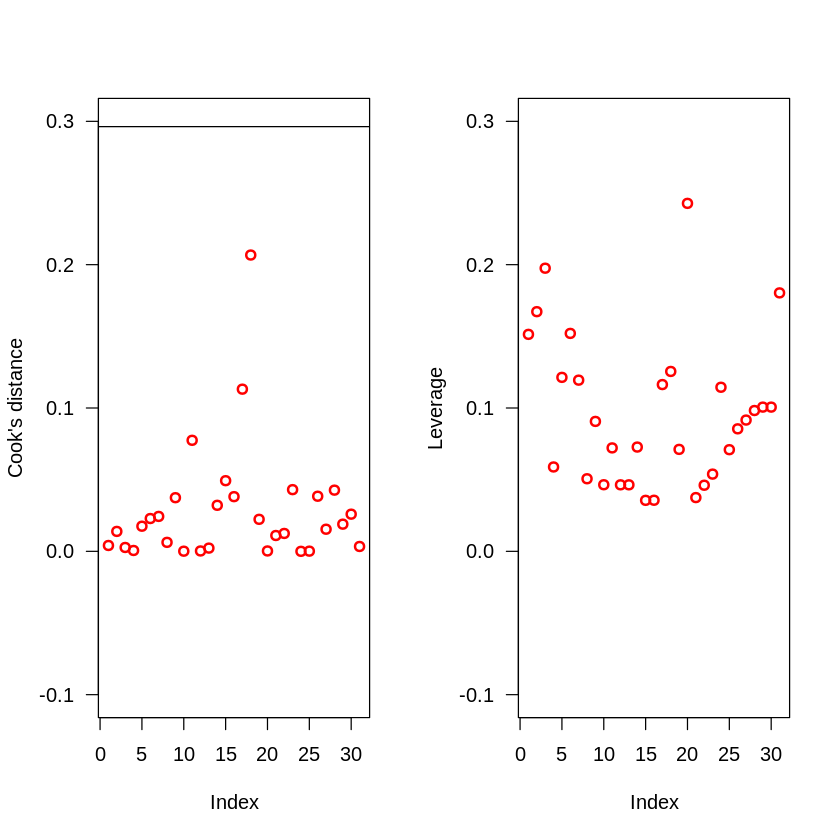

In [ ]:
%%R

par(mfrow=c(1,2))
cd <- cooks.distance(trees_m3)
plot( cd, col="red", cex=1.0, lwd=2, ylab="Cook's distance", las=1, ylim = c(-0.1,0.3))
abline(h = (8/(31-4)))
lev <- hatvalues(trees_m3)
plot( lev, col="red", cex=1.0, lwd=2, ylab="Leverage", las=1, ylim = c(-0.1,0.3))

In [ ]:
%%R

infl <- which.max(cd)
infl
cd[infl]

18 
18

18 
0.2067211

In [ ]:
%%R

cooks.distance(trees_m3)

1            2            3            4            5            6 
4.082875e-03 1.390620e-02 2.692504e-03 5.964593e-04 1.752456e-02 2.288955e-02 
           7            8            9           10           11           12 
2.436267e-02 6.264727e-03 3.742581e-02 1.003986e-04 7.746218e-02 2.609472e-04 
          13           14           15           16           17           18 
2.251272e-03 3.211862e-02 4.929254e-02 3.815356e-02 1.131422e-01 2.067211e-01 
          19           20           21           22           23           24 
2.233518e-02 2.614032e-04 1.104597e-02 1.247802e-02 4.304539e-02 4.252042e-06 
          25           26           27           28           29           30 
1.374721e-04 3.844647e-02 1.542758e-02 4.269362e-02 1.896139e-02 2.592849e-02 
          31 
3.393537e-03

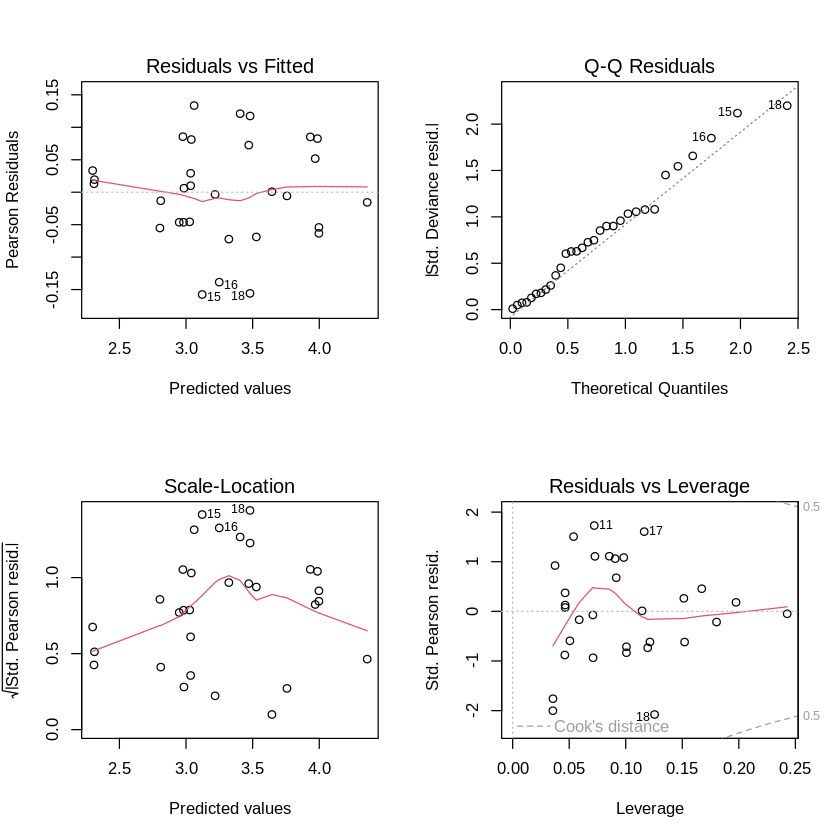

In [ ]:
%%R

par(mfrow=c(2,2))
plot(trees_m3)

Let's try to estimate coefficients in the model, where we omitt obesrvation with largest influence.

In [ ]:
%%R

trees_m3_infl <- update(trees_m3, subset=(-infl) )
coef(trees_m3_infl)
coef(trees_m3)

(Intercept)  log(Girth) log(Height) 
  -7.209148    1.957366    1.267528

(Intercept)  log(Girth) log(Height) 
  -6.691109    1.980412    1.132878

Let's do the same, but omit the first observation instead.

In [ ]:
%%R

trees_m3.omit1 <- update(trees_m3, subset=(-1) ) # Vynecháme pozorování 1
coef(trees_m3.omit1)
coef(trees_m3)

(Intercept)  log(Girth) log(Height) 
  -6.703461    1.986711    1.131840

(Intercept)  log(Girth) log(Height) 
  -6.691109    1.980412    1.132878

A negligible change again

**Function `influence.measures()`.**

We know it from `lm()` and the usage is very similar. It obtain Cooks distance (`cook.d`) and diagonal elemtns of hat matrix (`hat`) and other influence measures.

In [ ]:
%%R

? influence.measures
influence.measures(trees_m3)

Influence measures of
	 glm(formula = Volume ~ log(Girth) + log(Height), family = Gamma(link = log),      data = trees) :

     dfb.1_ dfb.l.G. dfb.l.H.    dffit cov.r   cook.d    hat inf
1   0.01541 -0.08301  0.00489  0.10706 1.305 4.08e-03 0.1514    
2   0.12033 -0.08208 -0.08956  0.19716 1.311 1.39e-02 0.1672    
3   0.06539 -0.02105 -0.05397  0.08707 1.385 2.69e-03 0.1975   *
4  -0.01054  0.02087  0.00449 -0.04134 1.181 5.96e-04 0.0589    
5   0.14519  0.17150 -0.17040 -0.22808 1.218 1.75e-02 0.1214    
6   0.18633  0.19107 -0.21187 -0.26062 1.261 2.29e-02 0.1520    
7  -0.22755 -0.02840  0.20956 -0.27056 1.194 2.44e-02 0.1194    
8   0.01435  0.08115 -0.03237 -0.13630 1.130 6.26e-03 0.0506    
9  -0.19289 -0.22737  0.22688  0.32354 1.094 3.74e-02 0.0906    
10 -0.00140 -0.00917  0.00349  0.01684 1.169 1.00e-04 0.0465    
11 -0.25140 -0.31389  0.30058  0.47271 0.887 7.75e-02 0.0722    
12 -0.00565 -0.01495  0.00872  0.02713 1.168 2.61e-04 0.0464    
13 -0.01652 -0.04372  0.02551  0

In [ ]:
im <- influence.measures(trees_m3)
names(im)

im$infmat <- round(im$infmat, 3 )
 head( im$infmat )

[1] "infmat" "is.inf" "call"

,dfb.1_,dfb.l(G),dfb.l(H),dffit,cov.r,cook.d,hat
1,0.015,-0.083,0.005,0.107,1.305,0.004,0.151
2,0.120,-0.082,-0.090,0.197,1.311,0.014,0.167
3,0.065,-0.021,-0.054,0.087,1.385,0.003,0.198
4,-0.011,0.021,0.004,-0.041,1.181,0.001,0.059
5,0.145,0.171,-0.170,-0.228,1.218,0.018,0.121
6,0.186,0.191,-0.212,-0.261,1.261,0.023,0.152


In [ ]:
#Compare cooks distances from im and directly from the function cooks.distance()
colSums( im$is.inf )
signif(cooks.distance(trees_m3), 1)
im$infmat[,"cook.d"]

dfb.1_ dfb.l(G) dfb.l(H)    dffit    cov.r   cook.d      hat 
       0        0        0        0        3        0        0

1     2     3     4     5     6     7     8     9    10    11    12    13 
4e-03 1e-02 3e-03 6e-04 2e-02 2e-02 2e-02 6e-03 4e-02 1e-04 8e-02 3e-04 2e-03 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
3e-02 5e-02 4e-02 1e-01 2e-01 2e-02 3e-04 1e-02 1e-02 4e-02 4e-06 1e-04 4e-02 
   27    28    29    30    31 
2e-02 4e-02 2e-02 3e-02 3e-03

1     2     3     4     5     6     7     8     9    10    11    12    13 
0.004 0.014 0.003 0.001 0.018 0.023 0.024 0.006 0.037 0.000 0.077 0.000 0.002 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
0.032 0.049 0.038 0.113 0.207 0.022 0.000 0.011 0.012 0.043 0.000 0.000 0.038 
   27    28    29    30    31 
0.015 0.043 0.019 0.026 0.003

No suspicious outliers or leverage points.

Another tools

In [ ]:
install.packages("boot")
library(boot)
glm.diag.plots(trees_m3, glmdiag = glm.diag(trees_m3), iden = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘boot’


The following object is masked from ‘package:surveillance’:

    control


The following object is masked from ‘package:car’:

    logit




## Predictions from final model


In [ ]:
par(mfrow=c(1,2))
plot(trees$Volume ~ trees$Girth, col="red", cex=0.9, lwd=1.5,
     xlab = "Girth", ylab="Volume", las=1)
legend("topleft", inset = .05, legend = c("Data", "Model 3"),
       col = c(2,4), bty="n", lwd = 1.5, pch=c(1,NA), cex=0.9, lty=c(0,1))
lines(fitted(trees_m3) ~ trees$Girth, col="blue", type = "l", lwd=1.5)

trees_3 <- data.frame(trees, fitted(trees_m3))
trees_3 <- trees_3[order(trees_3$Height),]
plot(trees_3$Volume ~ trees_3$Height, col="red", cex=0.9, lwd=1.5,
     xlab = "Height", ylab="Volume", las=1)
legend("topleft", inset = .05, legend = c("Data", "Model 3"),
       col = c(2,4), bty="n", lwd = 1.5, pch=c(1,NA), cex=0.9, lty=c(0,1))
lines(trees_3$fitted.trees_m3. ~ trees_3$Height, col="blue", type = "l", lwd=1.5)

Figure from: https://link.springer.com/chapter/10.1007/978-1-4419-0118-7_8

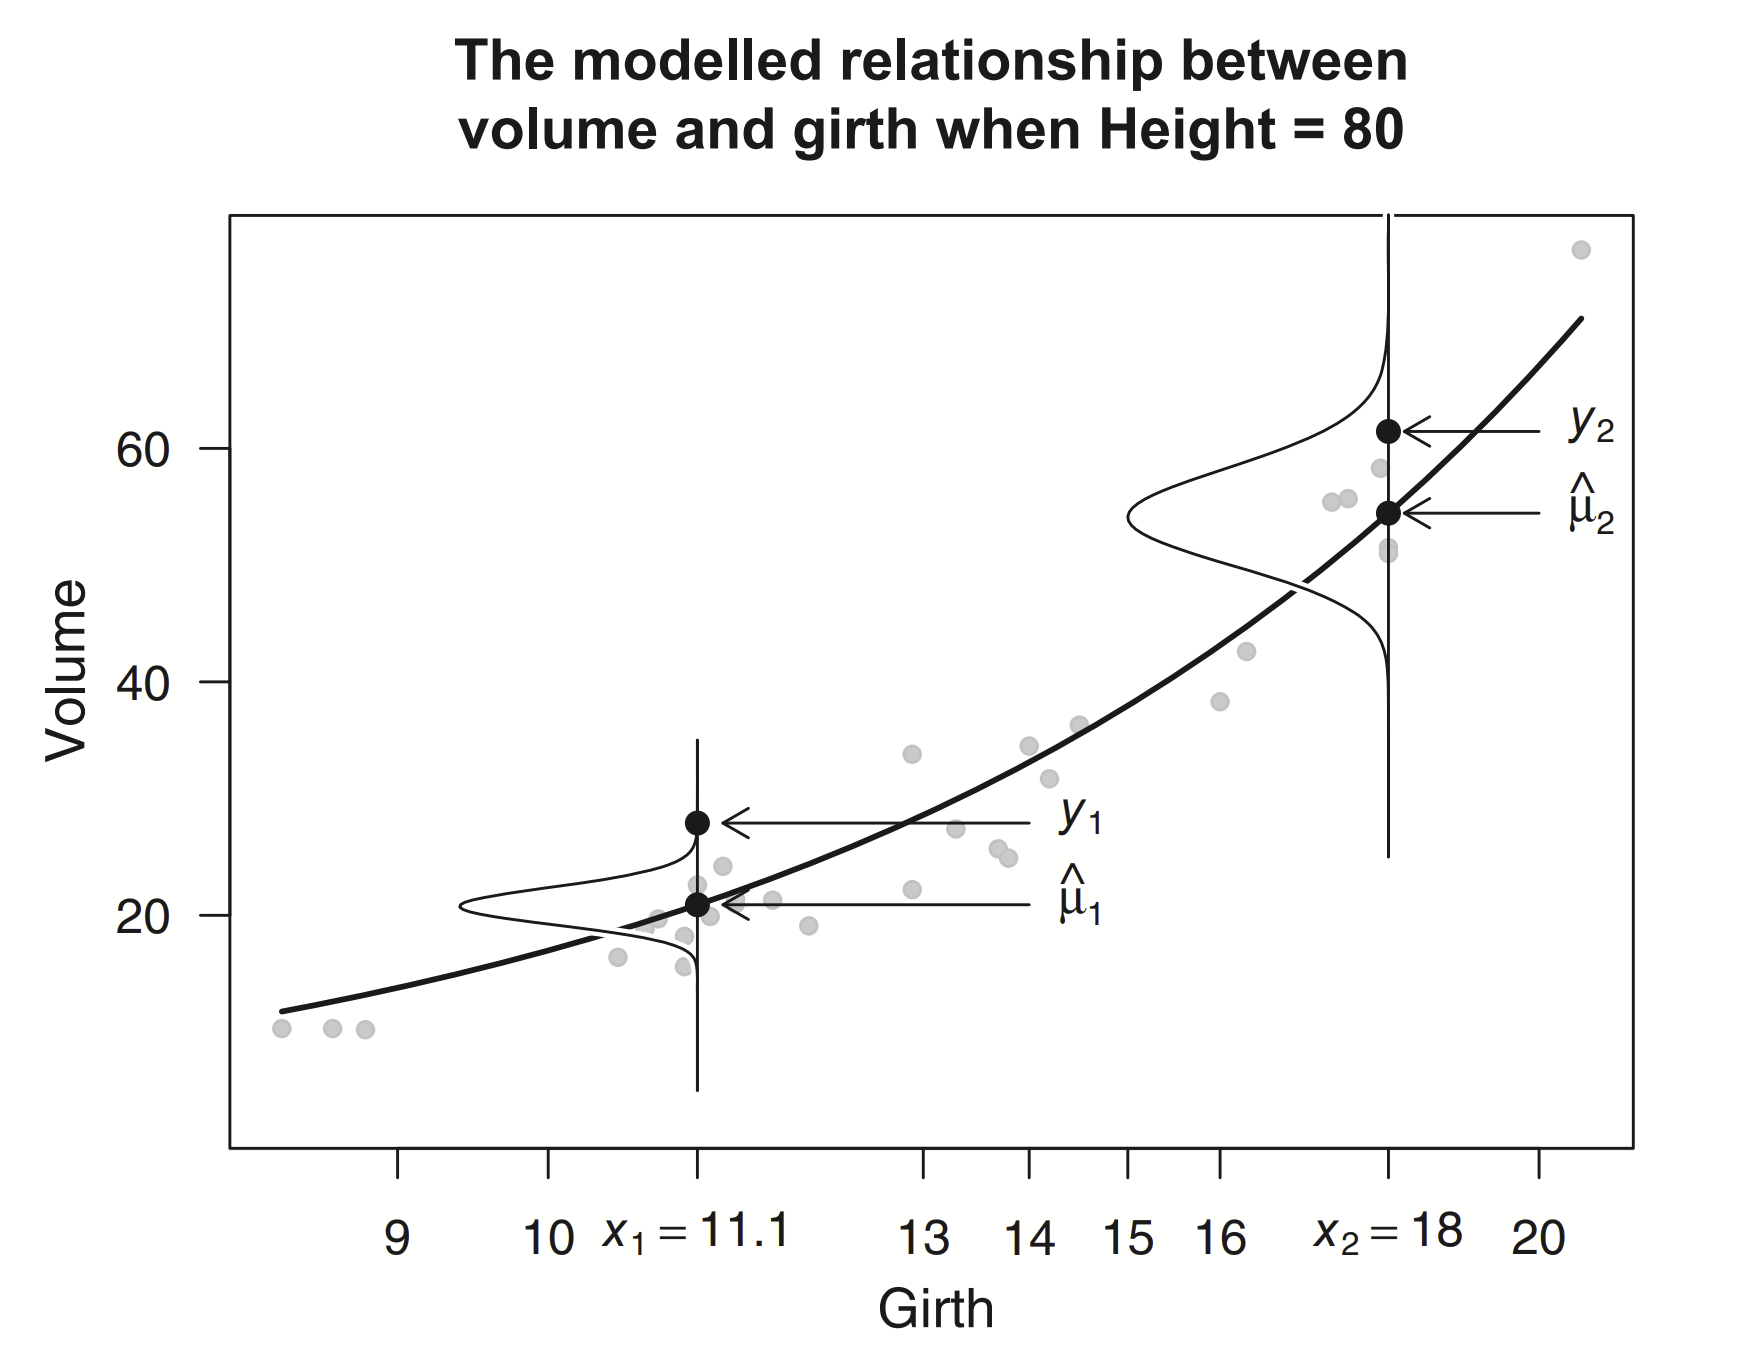







Back to Python

In [ ]:
trees_modeled['fitted2'] = trees_m2.fittedvalues
trees_modeled['r_deviance_std2'] = trees_m2.resid_deviance
trees_modeled['r_pearson_std2'] = trees_m2.resid_pearson
trees_modeled

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['fitted2'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['Girth'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Girth",
       y = "Deviance standartized residuals")

In [ ]:
ggplot(trees_modeled, aes(x = trees_modeled['Height'], y = trees_modeled['r_deviance_std2'])) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Height",
       y = "Deviance standartized residuals")

We have correct link function, but we still have  problems with  systematic component and residual plots. Lets try some transformations of covariates.

### Model 3 (_m3)

We use log transformation of both $x_j$'s.

In [ ]:
trees_m3 = smf.glm('Volume ~  log_Height + log_Girth', data=log_trees, family=sm.families.Gamma(link=sm.families.links.log)).fit()
print(trees_m3.summary())

All covariates are significant in the model.



In [ ]:
fitted3 = trees_m3.fittedvalues
r_deviance_std3 = trees_m3.resid_deviance
r_pearson_std3 = trees_m3.resid_pearson

In [ ]:
ggplot(trees_modeled, aes(x = fitted3, y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "Fitted values",
       y = "Deviance standartized residuals")

In [ ]:
ggplot(trees_modeled, aes(x = log_trees['log_Girth'], y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "log(Girth)",
       y = "Deviance standartized residuals")

In [ ]:
ggplot(trees_modeled, aes(x = log_trees['log_Height'], y = r_deviance_std3)) + \
  geom_smooth() + \
  geom_point() + \
  labs(x = "log(Height)",
       y = "Deviance standartized residuals")

In [ ]:
# missing linear predictor

Model 3 is sufficient :-)

Lets check AIC statistics for all three models.

In [ ]:
AIC_1 = trees_m1.aic
AIC_2 = trees_m2.aic
AIC_3 = trees_m3.aic
print(AIC_1,AIC_2,AIC_3)

### Question:

* Why  we chose log transformation?
* Are residuals from the model 3 normal?

In [ ]:
# missing
''' in R:
# Deviance residauls
qqnorm(r_deviance_std, las=1 )
qqline(r_deviance_std)
# Deviance residauls
qqnorm(r_pearson_std2, las=1 )
qqline(r_pearson_std2)
'''

In [ ]:
# vychází jinak
r_anscombe = trees_m3.resid_anscombe_scaled
print(r_anscombe)

Check normality with test

In [ ]:
stats.kstest(r_anscombe, 'norm')

In [ ]:
stats.shapiro(r_anscombe)

**Cook distance**

Let $\hat\beta_{(-i)}$ denotes estimation of $\beta$ computed without observation  $i$. Cook distance for $i$th observation is defined by
$$CD_i = \frac{1}{p} \left(\hat\beta - \hat\beta_{(-i)}\right)^T X^T W^{-1} X \left(\hat\beta - \hat\beta_{(-i)}\right)$$
but its computed by
$$
CD_i = \frac{1}{p} \left( r_i^{PS}\right)^2 \frac{h_{ii}}{1-h_{ii}}
$$
and observation is influence if
$$
CD_i \ > \ \frac{8}{n-2p}
$$

In [ ]:
influence = trees_m3.get_influence()
cooks = influence.cooks_distance

In [ ]:
influence.plot_influence()

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [ ]:
influence.plot_index()
abline(0, 8/(31-4))
plt.show()

In [ ]:
hatvalues = trees_m3.get_hat_matrix_diag()

In [ ]:
plt.scatter(log_trees.index, hatvalues)
plt.show()

In [ ]:
influence = trees_m3.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum)

# Your Turn

## Analyse data of car accidents in Sweeden.

## Your Turn: HW 05

Problem 8.6. from the book:


The standardized deviance residual $r^{DS}$ is approximately the reduction
in the residual deviance when Observation $i$ is omitted from the data. Demonstrate this by R code using the $trees$ data as follows.

* Fit the model m_1 as

  `data(trees)`
   `model_full <- glm( Volume ~ log(Girth) + log(Height),family=Gamma(link=log), data=trees)`
 Compute the residual deviance, the Pearson estimate of $\phi$, and the standardized deviance residuals from this model.

* Omit Observation 1 from `trees`, and refit the model. Call this model
`model_omit_1`.

* Compute the difference between the residual deviance for the full model
`model_full` and for model `model_omit_1`. Show that this differences divided by the Pearson estimate of $\phi$ is approximately the standardized
deviance residuals squared.

* Repeat the above process for every observation $i$. At each iteration, call this model `model_omit_i`. Then, compute the difference between the deviance for the full model `model_full` and for model `model_omit_i`. Show that these differences divided by $\phi$ are approximately the standardized residuals squared.


# Additional Turn

## Analyse data of car accidents in Sweeden.

In [ ]:
sweden2 <- "https://raw.githubusercontent.com/francji1/01ZLMA/main/data/sweden.csv"
cars    <- read.table(sweden2, header = T, sep = ",")
summary(cars)
head(cars)



Dataset contains the number of deaths, he number of registered cars, the annual volume of sold fuels, the number of registered vehicles and the year. Our goal will be to create the best possible model for death rates. Since these are the number of events per unit time, we use the Poisson distribution with the *canonical link function*  $g (\mu) = log(\mu) $.

Because the observed period is relatively long and there have been significant changes in transport, we will only consider data from 1975.

In [ ]:
par(mfrow=c(1,2))
plot(cars$Deaths~cars$Year, col="red", lwd=2)
cars <- cars[cars$Year>1974,]
plot(cars$Deaths~cars$Year, col="red", lwd=2)

In [ ]:
attach(cars)

In [ ]:
ggpairs(cars)

# Tasks

* Find the best posssible model. Try add all varariables up to the second order interactions. You can use `step()` function based on `AIC`.
* Analyse residuals and check systematic components.
* If incorrect linear predictor appears, try to transform corresponding variable. Hint: `Fuel_transformed <- log(abs(Fuel-mean(Fuel)))`
* Run post hoc analysis of your final model again
* Find influence observations and decide how to cope with them (if any)
* Hide last 5 observations, train the model using remaining and try to predict response for the 5 hidden latest observations. Plot predictiions together with true observations.
